In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# XLM

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, XLNetForSequenceClassification
import torch

reddit_file_path = '/content/drive/My Drive/reddit.csv'

# 1. Reddit verilerini yükleme
reddit_df = pd.read_csv(reddit_file_path,index_col=0)
reddit_df

,Unique,created_utc
0,Which crypto is the best ???-> Setup,2024-12-26 10:25:05
1,Can I mine btc with an old gaming pc from 2017...,2024-12-23 13:55:49
2,Need a sticky,2024-12-20 18:53:34
3,Looking into mining crypto,2024-12-20 17:24:17
4,GPU Mining NEXA Is Over ASICs Online,2024-12-20 13:48:11
...,...,...
45804,I’m basically looking to automate my trading o...,2024-08-19 10:33:56
45805,"Hi,\n\nI have one running solo validator (Ligh...",2024-01-22 16:13:36
45806,"Hi, After some help. my validator has become u...",2024-01-21 02:21:58
45807,I have noticed a lot of airdrops for restaking...,2024-01-17 20:32:32


In [ ]:
# Tarih bilgisini reddit_df'ye ekleyelim
reddit_df['Date'] = reddit_df['created_utc']
# Tarih sütununu datetime formatına dönüştürelim
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])
reddit_df['Date'] = reddit_df['Date'].dt.date
# Tarih sütununa göre sıralama yapalım (küçükten büyüğe)
reddit_df = reddit_df.sort_values(by='Date')

# Sonuçları kontrol edelim
reddit_df

,Unique,created_utc,Date
44731,It amazes me that people over at /r/ethtrader ...,2016-02-17 20:12:14,2016-02-17
45199,What are the key performance indicators that p...,2016-02-17 22:27:30,2016-02-17
45135,Here are a few things that I think Ethereum ne...,2016-02-17 20:10:15,2016-02-17
22295,"Augur beta is 100%, ready for security testing...",2016-02-17 17:02:36,2016-02-17
22294,Key Performance Indicators for Long-Term Inves...,2016-02-17 22:27:30,2016-02-17
...,...,...,...
17426,NY Attorney General files lawsuit to recoup $2...,2025-01-12 05:34:47,2025-01-12
17427,Ethtrader Macro Update: Weekly ETF Recap and W...,2025-01-12 04:59:41,2025-01-12
17428,"Can The Ethereum Price Rebound To $4,000 This ...",2025-01-12 03:09:30,2025-01-12
17422,A continuación.,2025-01-12 07:22:10,2025-01-12


In [ ]:
reddit_df
import pandas as pd

# 'Date' sütununu datetime formatına dönüştürme
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])

# 2017-2021 ve 2021-2025 arası verileri ayırma
df_2017_2022 = reddit_df[reddit_df['Date'].dt.year <= 2022]
df_2023_2025 = reddit_df[reddit_df['Date'].dt.year > 2022]

# Sonuçları kontrol etme
print(df_2017_2022.head())
print(df_2023_2025.head())


                                                  Unique          created_utc  \
44731  It amazes me that people over at /r/ethtrader ...  2016-02-17 20:12:14   
45199  What are the key performance indicators that p...  2016-02-17 22:27:30   
45135  Here are a few things that I think Ethereum ne...  2016-02-17 20:10:15   
22295  Augur beta is 100%, ready for security testing...  2016-02-17 17:02:36   
22294  Key Performance Indicators for Long-Term Inves...  2016-02-17 22:27:30   

            Date  
44731 2016-02-17  
45199 2016-02-17  
45135 2016-02-17  
22295 2016-02-17  
22294 2016-02-17  
                                                  Unique          created_utc  \
12078  My first ETH staking payout of the New Year!!!...  2023-01-01 18:58:05   
14289          How ethereum has been made from scratch ?  2023-01-01 14:23:04   
5487                                   Ready for 2023...  2023-01-01 01:05:33   
8544         Staking rewards 2021 & 2022. Let’s go 2023!  2023-01-01 20:30:

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import drive

In [ ]:
# nltk indirmeleriimport nltk
nltk.download('all')
nltk.download('punkt')  # Punkt tokenizer'ı indirir
nltk.download('stopwords')
nltk.download('punkt')


# İngilizce stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Metni küçük harfe çevirme
    text = text.lower()
    # Link ve özel karakterleri kaldırma
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize etme ve stopwords temizleme
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Reddit metinlerine temizlik uygulama
reddit_df['cleaned_text'] = reddit_df['Unique'].fillna('').apply(clean_text)
df_2017_2022['cleaned_text'] = df_2017_2022['Unique'].fillna('').apply(clean_text)
df_2023_2025['cleaned_text'] = df_2023_2025['Unique'].fillna('').apply(clean_text)

# İlk temizlenmiş metinlere bakalım
print(df_2017_2022[['Unique', 'cleaned_text']].head())


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

                                                  Unique  \
44731  It amazes me that people over at /r/ethtrader ...   
45199  What are the key performance indicators that p...   
45135  Here are a few things that I think Ethereum ne...   
22295  Augur beta is 100%, ready for security testing...   
22294  Key Performance Indicators for Long-Term Inves...   

                                            cleaned_text  
44731  amazes people rethtrader treating like kind ge...  
45199  key performance indicators people following ad...  
45135  things think ethereum needs thrive top head di...  
22295            augur beta ready security testing stage  
22294      key performance indicators longterm investors  


<ipython-input-8-ff1ff20f8628>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['cleaned_text'] = df_2023_2025['Unique'].fillna('').apply(clean_text)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER analizörü
analyzer = SentimentIntensityAnalyzer()

# Duygu skorlarını hesaplama
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Genel duygu skorunu döndür

df_2017_2022['compound_score'] = df_2017_2022['cleaned_text'].apply(analyze_sentiment)


<ipython-input-9-a3c99db40fea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['compound_score'] = df_2017_2022['cleaned_text'].apply(analyze_sentiment)


In [ ]:
def sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'


df_2017_2022['sentiment'] = df_2017_2022['compound_score'].apply(sentiment_label)
df_2017_2022 = df_2017_2022[df_2017_2022['sentiment'].notna()]
df_2017_2022.head()

reddit_DF = reddit_df.copy()

<ipython-input-10-86a008776da5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['sentiment'] = df_2017_2022['compound_score'].apply(sentiment_label)


In [ ]:
from transformers import  Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
from torch.utils.data import Dataset

# Sadece gerekli sütunları seçin
# "Unique" -> Metin; "Sentiment" -> Etiket (Eğitim verisinde duygular belli olmalı)
df_2017_2022 = df_2017_2022[['cleaned_text', 'sentiment']]

# 2. Etiketleri sayısallaştırma
label_map = {"negative": 0, "positive": 1}
df_2017_2022['sentiment'] = df_2017_2022['sentiment'].map(label_map)
print(df_2017_2022)
# 3. Eğitim ve test verisi oluşturma
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_2017_2022['cleaned_text'], df_2017_2022['sentiment'], test_size=0.2, random_state=42
)

                                            cleaned_text  sentiment
44731  amazes people rethtrader treating like kind ge...          1
45135  things think ethereum needs thrive top head di...          1
22295            augur beta ready security testing stage          1
44480  conversation much different certain parties re...          1
21575                               think sub great idea          1
...                                                  ...        ...
13935  top evm blockchain networks terms transactions...          1
13933                     ethereum miner super connector          1
33248  would like initiate thread express gratitude e...          1
36831  early eth tvl miner super connector tg twitter...          1
36832  sometimes lose sight user experience like noob...          1

[8972 rows x 2 columns]


<ipython-input-11-b218123c820c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['sentiment'] = df_2017_2022['sentiment'].map(label_map)


In [ ]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
class RedditDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Tokenizer'ı yükleme
tokenizer = AutoTokenizer.from_pretrained("xlnet/xlnet-base-cased", num_labels = 2)

# Dataset'leri oluşturma
train_dataset = RedditDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_length=128)
val_dataset = RedditDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score
)
from transformers import  Trainer, TrainingArguments
from evaluate import load
import time
import numpy as np
import matplotlib.pyplot as plt

# Modeli yükleme
model = XLNetForSequenceClassification.from_pretrained("xlnet/xlnet-base-cased", num_labels=2)

# Eğitim parametreleri
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/models/xlnet_model1',
    num_train_epochs=10,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    dataloader_num_workers=12,
    learning_rate=1e-5
)

# Metrikleri tanımlama
accuracy_metric = load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')  # Sensitivity
    specificity = recall_score(labels, predictions, pos_label=0)  # Specificity
    f1 = f1_score(labels, predictions, average='binary')
    auc_value = roc_auc_score(labels, logits[:, 1])
    return {
        "accuracy": accuracy["accuracy"],
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1": f1,
        "auc": auc_value
    }

# Trainer'ı oluşturma
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Eğitim zamanı ölçümü
start_time = time.time()
trainer.train()
training_time = time.time() - start_time

# Modeli kaydetme
model.save_pretrained('/content/drive/MyDrive/models/xlnet_model')
tokenizer.save_pretrained('/content/drive/MyDrive/models/xlnett_model')

print(f"Model eğitimi tamamlandı! Eğitim süresi: {training_time:.2f} saniye")

# Çıkarım zamanı ölçümü
start_time = time.time()
predictions = trainer.predict(val_dataset)
inference_time = time.time() - start_time

# Çıkarım süresini yazdırma
print(f"Model çıkarımı tamamlandı! Çıkarım süresi: {inference_time:.2f} saniye")

# Tahminler ve metrikler
logits, labels = predictions.predictions, predictions.label_ids
predicted_labels = np.argmax(logits, axis=-1)



Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet/xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-3d29e6d7ea68>:62: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall (sensitivity),Specificity,F1,Auc
1,0.676900,0.554706,0.769359,0.770519,0.997831,0.002427,0.869565,0.548491
2,0.523800,0.579579,0.770474,0.770474,1.000000,0.000000,0.870359,0.599376
3,0.511200,0.519131,0.770474,0.770474,1.000000,0.000000,0.870359,0.643067
4,0.494200,0.512959,0.769916,0.770346,0.999277,0.000000,0.870003,0.693717
5,0.469800,0.458444,0.771031,0.771812,0.997831,0.009709,0.870388,0.769066
6,0.445800,0.403266,0.806685,0.807236,0.984093,0.211165,0.886934,0.832101
7,0.395600,0.346903,0.849582,0.874747,0.939262,0.548544,0.905858,0.876245
8,0.343000,0.338998,0.862953,0.871326,0.964570,0.521845,0.915580,0.899151
9,0.297700,0.286305,0.876880,0.906863,0.936370,0.677184,0.921380,0.920668
10,0.303200,0.279631,0.878552,0.900895,0.946493,0.650485,0.923131,0.930001


Model eğitimi tamamlandı! Eğitim süresi: 568.62 saniye


Model çıkarımı tamamlandı! Çıkarım süresi: 5.65 saniye


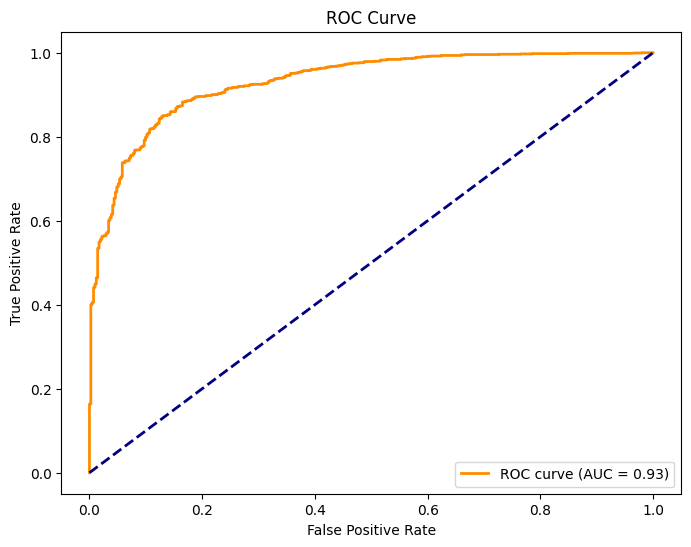

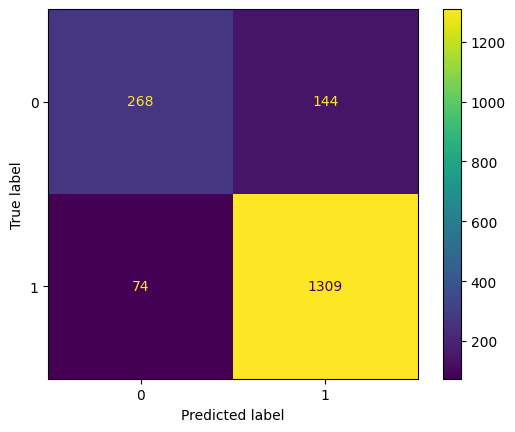

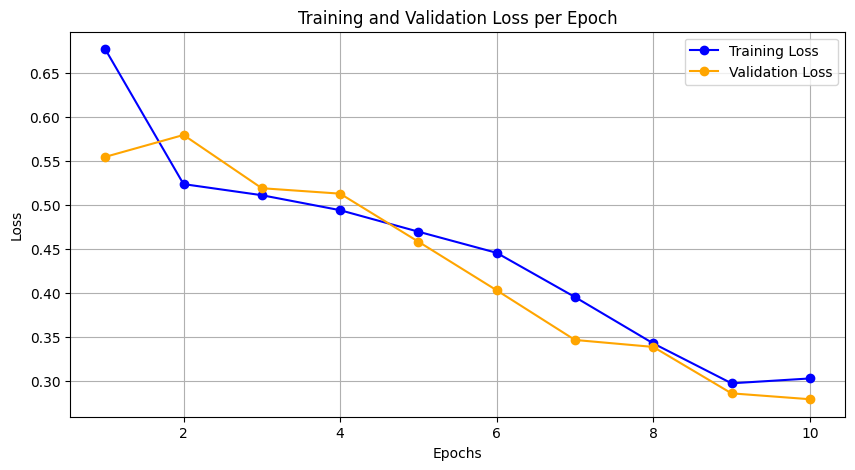

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
training_loss = [0.676900, 0.523800,0.511200,0.494200,0.469800,0.445800,0.395600,0.343000,0.297700,0.303200]
validation_loss = [0.554706, 0.579579,0.519131,0.512959,0.458444,0.403266,0.346903,0.338998,0.286305,0.279631]
epochs = [1,2,3,4,5,6,7,8,9,10]



# ROC eğrisi ve AUC hesaplama
fpr, tpr, _ = roc_curve(labels, logits[:, 1])
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


ConfusionMatrixDisplay.from_predictions(labels, predicted_labels)

# Kayıp grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label="Training Loss", marker='o', color='blue')
plt.plot(epochs, validation_loss, label="Validation Loss", marker='o', color='orange')
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



In [ ]:
import torch

# Cihazı kontrol et
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modeli cihaz üzerine taşıma
model.to(device)
label_map = {0: 'negative', 1: 'positive'}


# Eğitilmiş modeli yükleyin
model = XLNetForSequenceClassification.from_pretrained('/content/drive/MyDrive/models/xlnet_model')
tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/models/xlnett_model')
model.to(device)
# Metin için sentiment tahmini
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=-1)
    predicted_class = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][predicted_class].item()
    return label_map[predicted_class],confidence

# Tahmin sonuçları
df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))
df_2023_2025.to_csv('/content/df_2021_2025_with_sentimentalxlnet.csv', index=False)


<ipython-input-20-81eefeed769a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))
<ipython-input-20-81eefeed769a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))


In [ ]:
df_2023_2025

,Unique,created_utc,Date,cleaned_text,Sentiment,Confidence
12078,My first ETH staking payout of the New Year!!!...,2023-01-01 18:58:05,2023-01-01,first eth staking payout new year lfg glta,positive,0.949475
14289,How ethereum has been made from scratch ?,2023-01-01 14:23:04,2023-01-01,ethereum made scratch,positive,0.742418
5487,Ready for 2023...,2023-01-01 01:05:33,2023-01-01,ready,positive,0.993868
8544,Staking rewards 2021 & 2022. Let’s go 2023!,2023-01-01 20:30:31,2023-01-01,staking rewards lets go,positive,0.985239
37186,how vitalik code ethereum in a low programming...,2023-01-01 14:23:04,2023-01-01,vitalik code ethereum low programming language...,positive,0.948437
...,...,...,...,...,...,...
17426,NY Attorney General files lawsuit to recoup $2...,2025-01-12 05:34:47,2025-01-12,ny attorney general files lawsuit recoup crypt...,negative,0.858664
17427,Ethtrader Macro Update: Weekly ETF Recap and W...,2025-01-12 04:59:41,2025-01-12,ethtrader macro update weekly etf recap week a...,positive,0.928340
17428,"Can The Ethereum Price Rebound To $4,000 This ...",2025-01-12 03:09:30,2025-01-12,ethereum price rebound january,positive,0.964680
17422,A continuación.,2025-01-12 07:22:10,2025-01-12,continuacin,positive,0.995442


In [ ]:
price_df_path = '/content/drive/My Drive/price.csv'
price_df = pd.read_csv(price_df_path)

# Tarih sütununu datetime formatına dönüştürelim
price_df['Open Time'] = pd.to_datetime(price_df['Open Time'])
price_df['Open Time'] = price_df['Open Time'].dt.date

# Tarih sütununa göre sıralama yapalım (küçükten büyüğe)
price_df = price_df.sort_values(by='Open Time')

price_df["Price Difference"] = price_df["Close"] - price_df["Open"]

# Sonuçları kontrol edelim
price_df.head()#2017-08-17 2024-12-26

,Open Time,Open,High,Low,Close,Volume,Price Difference
0,2017-08-17,301.13,302.57,298.00,301.61,125.66877,0.48
19,2017-08-17,306.74,310.85,302.00,302.00,229.60620,-4.74
18,2017-08-17,308.57,310.74,303.44,306.74,368.36785,-1.83
17,2017-08-17,304.79,309.40,304.04,307.44,330.54526,2.65
16,2017-08-17,301.60,309.40,299.01,304.79,272.42251,3.19


In [ ]:
# `cleaned_text`'i temizleyelim (boş satırlar varsa silelim)
df_2023_2025 = df_2023_2025.dropna(subset=['cleaned_text'])

# Tarih sütunlarını datetime formatına dönüştürelim
df_2023_2025['Date'] = pd.to_datetime(df_2023_2025['Date'])
price_df['Open Time'] = pd.to_datetime(price_df['Open Time'])

# Sadece aynı tarihlerde ve `cleaned_text` verisi eşleşen satırları birleştirelim (inner join)
merged_df = pd.merge(df_2023_2025, price_df, left_on='Date', right_on='Open Time', how='inner')

# Sonuçları kontrol edelim

merged_df = merged_df.drop_duplicates(subset=['cleaned_text'])

merged_df['Price Direction'] = merged_df['Price Difference'].apply(lambda x: 1 if x > 0 else 0)

merged_df.tail()

,Unique,created_utc,Date,cleaned_text,Sentiment,Confidence,Open Time,Open,High,Low,Close,Volume,Price Difference,Price Direction
353921,If you're considering selling then a word of a...,2024-12-26 19:57:29,2024-12-26,youre considering selling word advice dont wou...,negative,0.740151,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353945,So for the past month I’ve been trying everyth...,2024-12-26 03:57:02,2024-12-26,past month ive trying everything obtain etheri...,positive,0.899480,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353969,Today I did a quick research on prediction mar...,2024-12-26 13:18:18,2024-12-26,today quick research prediction markets see th...,positive,0.993411,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353993,Help me obtain ethereium,2024-12-26 03:57:02,2024-12-26,help obtain ethereium,positive,0.998105,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
354017,Good day legends! 🤩 \n\n## Asia Update\n\nJapa...,2024-12-26 15:10:35,2024-12-26,good day legends asia update japans government...,positive,0.986431,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0


In [ ]:
silinecek_sutunlar = ["Unique", "created_utc"]

# Sütunları silme işlemi
merged_df1 = merged_df.drop(columns=silinecek_sutunlar)

In [ ]:
merged_df1['Sentiment'] = merged_df1['Sentiment'].map({'negative': -1, 'positive': 1})
merged_df1.head(15)

,Date,cleaned_text,Sentiment,Confidence,Open Time,Open,High,Low,Close,Volume,Price Difference,Price Direction
0,2023-01-01,first eth staking payout new year lfg glta,1,0.949475,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
24,2023-01-01,ethereum made scratch,1,0.742418,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
48,2023-01-01,ready,1,0.993868,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
72,2023-01-01,staking rewards lets go,1,0.985239,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
96,2023-01-01,vitalik code ethereum low programming language...,1,0.948437,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
120,2023-01-01,since staking eth last year date ive earned et...,1,0.975751,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
144,2023-01-02,make see nfts opensea,1,0.923685,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
168,2023-01-02,ethereum sticky developers million commits sub...,1,0.861941,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
192,2023-01-02,tickets blockchain fix,-1,0.961304,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
216,2023-01-03,said last month start year eth staked currentl...,1,0.989339,2023-01-03,1216.40,1219.24,1206.00,1210.33,26626.7998,-6.07,0


In [ ]:
merged_df1cop = merged_df1.groupby("Date", as_index=False)["Sentiment"].mean()
merged_df1cop

,Date,Sentiment
0,2023-01-01,1.000000
1,2023-01-02,0.333333
2,2023-01-03,0.600000
3,2023-01-04,1.000000
4,2023-01-05,0.714286
...,...,...
719,2024-12-22,0.517241
720,2024-12-23,0.594203
721,2024-12-24,0.454545
722,2024-12-25,0.444444


In [ ]:
merged_d2f1cop = merged_df1.groupby("Date", as_index=False)["Confidence"].mean()
merged_d2f1cop

,Date,Confidence
0,2023-01-01,0.932531
1,2023-01-02,0.915643
2,2023-01-03,0.879307
3,2023-01-04,0.981425
4,2023-01-05,0.926864
...,...,...
719,2024-12-22,0.861339
720,2024-12-23,0.858709
721,2024-12-24,0.868230
722,2024-12-25,0.901534


In [ ]:
df = merged_df1cop

In [ ]:
df = merged_df1[['Date','Open','Close','Volume']]

In [ ]:
df = df.drop_duplicates()

In [ ]:
# İki DataFrame'i birleştirme
merged_dfcs = pd.merge(merged_df1cop, merged_d2f1cop, on='Date', how='inner')
merged_dfcs =merged_dfcs.drop_duplicates()
merged_dfcs

,Date,Sentiment,Confidence
0,2023-01-01,1.000000,0.932531
1,2023-01-02,0.333333,0.915643
2,2023-01-03,0.600000,0.879307
3,2023-01-04,1.000000,0.981425
4,2023-01-05,0.714286,0.926864
...,...,...,...
719,2024-12-22,0.517241,0.861339
720,2024-12-23,0.594203,0.858709
721,2024-12-24,0.454545,0.868230
722,2024-12-25,0.444444,0.901534


In [ ]:
# İki DataFrame'i birleştirme
merged_dfcs = pd.merge(merged_dfcs, df, on='Date', how='inner')
merged_dfcs =merged_dfcs.drop_duplicates()
merged_dfcs

,Date,Sentiment,Confidence,Open,Close,Volume
0,2023-01-01,1.000000,0.932531,1197.16,1195.26,4804.4490
1,2023-01-02,0.333333,0.915643,1214.95,1216.78,9916.8659
2,2023-01-03,0.600000,0.879307,1216.40,1210.33,26626.7998
3,2023-01-04,1.000000,0.981425,1250.99,1253.72,7141.4744
4,2023-01-05,0.714286,0.926864,1252.91,1247.50,20901.5401
...,...,...,...,...,...,...
719,2024-12-22,0.517241,0.861339,3375.11,3370.97,13969.4647
720,2024-12-23,0.594203,0.858709,3349.07,3317.60,20883.6725
721,2024-12-24,0.454545,0.868230,3452.95,3455.91,27559.3590
722,2024-12-25,0.444444,0.901534,3482.57,3490.59,8613.9488


In [ ]:
aligned = 0
for idx in merged_df1.index:
        if merged_df1["Sentiment"][idx] > 0 and merged_df1["Price Direction"][idx] == 1:
            aligned += 1
        elif merged_df1["Sentiment"][idx] < 0 and merged_df1["Price Direction"][idx] == 0:
            aligned += 1
print(f"Movement prediction accuracy : " \
          f"{round(aligned/merged_df1.shape[0], 4)*100}%")

Movement prediction accuracy : 50.79%


In [ ]:
df3 = merged_df1[['Date','Confidence','Open','High','Low','Close', 'Price Difference', 'Price Direction']]

In [ ]:
df3

,Date,Confidence,Open,High,Low,Close,Price Difference,Price Direction
0,2023-01-01,0.949475,1197.16,1197.29,1193.54,1195.26,-1.90,0
24,2023-01-01,0.742418,1197.16,1197.29,1193.54,1195.26,-1.90,0
48,2023-01-01,0.993868,1197.16,1197.29,1193.54,1195.26,-1.90,0
72,2023-01-01,0.985239,1197.16,1197.29,1193.54,1195.26,-1.90,0
96,2023-01-01,0.948437,1197.16,1197.29,1193.54,1195.26,-1.90,0
...,...,...,...,...,...,...,...,...
353921,2024-12-26,0.740151,3358.01,3364.37,3336.80,3354.19,-3.82,0
353945,2024-12-26,0.899480,3358.01,3364.37,3336.80,3354.19,-3.82,0
353969,2024-12-26,0.993411,3358.01,3364.37,3336.80,3354.19,-3.82,0
353993,2024-12-26,0.998105,3358.01,3364.37,3336.80,3354.19,-3.82,0


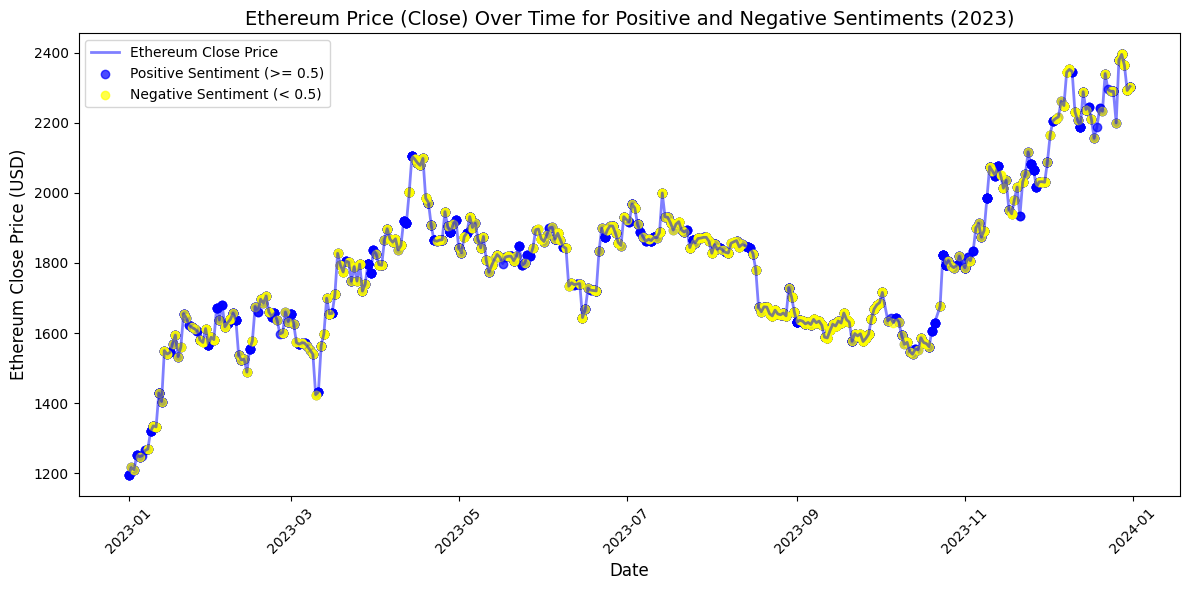

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df1' is the DataFrame containing the data

# Convert 'Date' to datetime if it's not already
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])

# Classify sentiment as positive (1) and negative (0) based on a threshold of 0.5
merged_df1['Sentiment Label'] = merged_df1['Sentiment'].apply(lambda x: 1 if x >= 0.5 else 0)

# Filter data for the year 2023
merged_df1 = merged_df1[merged_df1['Date'].dt.year == 2023]

# Plotting Ethereum price (Close) over time based on sentiment as scatter plot
plt.figure(figsize=(12,6))

# Plot normal Ethereum price (Close) over time as a line
plt.plot(merged_df1['Date'], merged_df1['Close'], label='Ethereum Close Price', color='blue', alpha=0.5, linewidth=2)

# Positive Sentiment (Sentiment >= 0.5)
positive_sentiment = merged_df1[merged_df1['Sentiment Label'] == 1]
plt.scatter(positive_sentiment['Date'], positive_sentiment['Close'], label='Positive Sentiment (>= 0.5)', color='blue', alpha=0.7)

# Negative Sentiment (Sentiment < 0.5)
negative_sentiment = merged_df1[merged_df1['Sentiment Label'] == 0]
plt.scatter(negative_sentiment['Date'], negative_sentiment['Close'], label='Negative Sentiment (< 0.5)', color='yellow', alpha=0.7)

# Adding labels and title
plt.title('Ethereum Price (Close) Over Time for Positive and Negative Sentiments (2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ethereum Close Price (USD)', fontsize=12)
plt.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = merged_dfcs
# Yön sütununu hesaplama
df['Direction'] = (df['Close'] > df['Open']).astype(int)

print(df)

          Date  Sentiment  Confidence     Open    Close      Volume  Direction
0   2023-01-01   1.000000    0.932531  1197.16  1195.26   4804.4490          0
1   2023-01-02   0.333333    0.915643  1214.95  1216.78   9916.8659          1
2   2023-01-03   0.600000    0.879307  1216.40  1210.33  26626.7998          0
3   2023-01-04   1.000000    0.981425  1250.99  1253.72   7141.4744          1
4   2023-01-05   0.714286    0.926864  1252.91  1247.50  20901.5401          0
..         ...        ...         ...      ...      ...         ...        ...
719 2024-12-22   0.517241    0.861339  3375.11  3370.97  13969.4647          0
720 2024-12-23   0.594203    0.858709  3349.07  3317.60  20883.6725          0
721 2024-12-24   0.454545    0.868230  3452.95  3455.91  27559.3590          1
722 2024-12-25   0.444444    0.901534  3482.57  3490.59   8613.9488          1
723 2024-12-26   0.562500    0.875440  3358.01  3354.19  16675.6435          0

[724 rows x 7 columns]


In [ ]:
train_data = df[df['Date'] < '2023-07-01']
test_data = df[df['Date'] >= '2023-07-01']

In [ ]:
# Eğitim ve test setlerinden özellik ve hedef sütunlarını ayırma
X_train = train_data[['Sentiment','Confidence', 'Volume']]
y_train = train_data['Direction']

X_test = test_data[['Sentiment','Confidence', 'Volume']]
y_test = test_data['Direction']

print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)


X_train:
     Sentiment  Confidence       Volume
0     1.000000    0.932531    4804.4490
1     0.333333    0.915643    9916.8659
2     0.600000    0.879307   26626.7998
3     1.000000    0.981425    7141.4744
4     0.714286    0.926864   20901.5401
..         ...         ...          ...
176   0.714286    0.892365   23474.3075
177   0.500000    0.871898   26396.8687
178   0.400000    0.926303   16301.5608
179   0.500000    0.819065   19885.3587
180   0.538462    0.904545  114030.6735

[181 rows x 3 columns]

y_train:
0      0
1      1
2      0
3      1
4      0
      ..
176    1
177    1
178    1
179    0
180    1
Name: Direction, Length: 181, dtype: int64


In [ ]:
# Modeli oluşturma ve eğitme
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Başarı oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.46


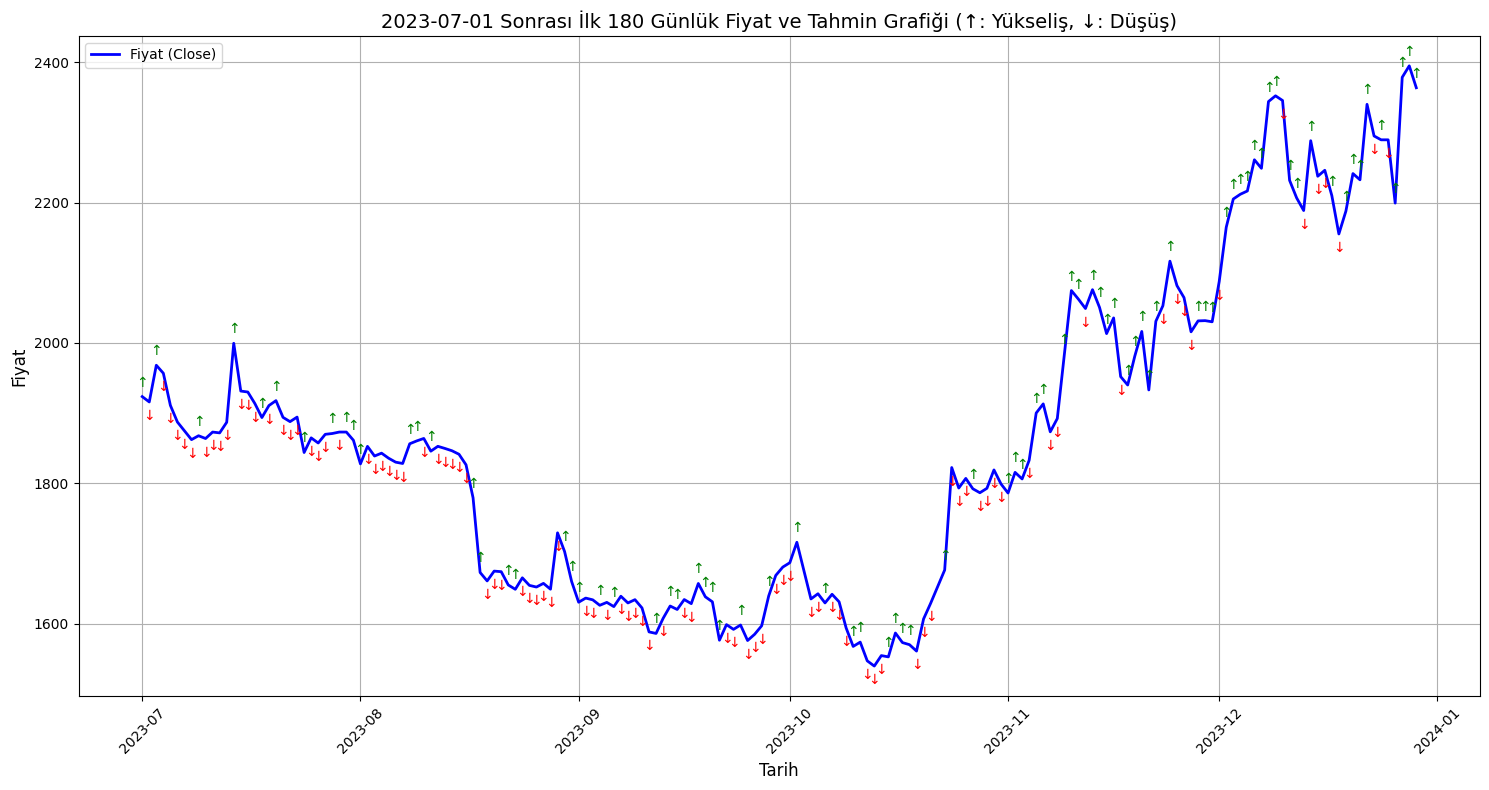

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tahmin sonuçlarını test veri setine ekleme
test_data = test_data.copy()  # Orijinal veriyi bozmamak için kopyalayın
test_data['Prediction'] = y_pred  # Tahminleri 'Prediction' sütununa ekle

# 2023-07-01 sonrası ilk 180 günü filtreleme
test_data_180 = test_data.head(180)  # İlk 180 günlük veriyi al

# Grafik oluşturma
plt.figure(figsize=(15, 8))

# Fiyat grafiği
plt.plot(test_data_180['Date'], test_data_180['Close'], label="Fiyat (Close)", color='blue', linewidth=2)

# Tahminlerin gösterimi
for i in range(len(test_data_180)):
    date = test_data_180['Date'].iloc[i]
    price = test_data_180['Close'].iloc[i]
    prediction = test_data_180['Prediction'].iloc[i]

    if prediction == 1:
        # Tahmin yükselişse "↑" işareti ekle
        plt.text(date, price + 10, '↑', color='green', fontsize=10, ha='center', va='bottom')
    else:
        # Tahmin düşüşse "↓" işareti ekle
        plt.text(date, price - 10, '↓', color='red', fontsize=10, ha='center', va='top')

# Grafik detayları
plt.title("2023-07-01 Sonrası İlk 180 Günlük Fiyat ve Tahmin Grafiği (↑: Yükseliş, ↓: Düşüş)", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Fiyat", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
print(test_data_180[['Date', 'Close', 'Prediction']].head(10))


          Date    Close  Prediction
181 2023-07-01  1923.50           1
182 2023-07-02  1915.87           0
183 2023-07-03  1968.17           1
184 2023-07-04  1956.78           0
185 2023-07-05  1911.00           0
186 2023-07-06  1887.25           0
187 2023-07-07  1874.62           0
188 2023-07-08  1862.21           0
189 2023-07-09  1867.74           1
190 2023-07-10  1863.80           0


# DistilBERT

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, DistilBertForSequenceClassification
import torch

reddit_file_path = '/content/drive/My Drive/reddit.csv'

# 1. Reddit verilerini yükleme
reddit_df = pd.read_csv(reddit_file_path,index_col=0)
reddit_df

,Unique,created_utc
0,Which crypto is the best ???-> Setup,2024-12-26 10:25:05
1,Can I mine btc with an old gaming pc from 2017...,2024-12-23 13:55:49
2,Need a sticky,2024-12-20 18:53:34
3,Looking into mining crypto,2024-12-20 17:24:17
4,GPU Mining NEXA Is Over ASICs Online,2024-12-20 13:48:11
...,...,...
45804,I’m basically looking to automate my trading o...,2024-08-19 10:33:56
45805,"Hi,\n\nI have one running solo validator (Ligh...",2024-01-22 16:13:36
45806,"Hi, After some help. my validator has become u...",2024-01-21 02:21:58
45807,I have noticed a lot of airdrops for restaking...,2024-01-17 20:32:32


In [ ]:
# Tarih bilgisini reddit_df'ye ekleyelim
reddit_df['Date'] = reddit_df['created_utc']
# Tarih sütununu datetime formatına dönüştürelim
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])
reddit_df['Date'] = reddit_df['Date'].dt.date
# Tarih sütununa göre sıralama yapalım (küçükten büyüğe)
reddit_df = reddit_df.sort_values(by='Date')

# Sonuçları kontrol edelim
reddit_df

,Unique,created_utc,Date
44731,It amazes me that people over at /r/ethtrader ...,2016-02-17 20:12:14,2016-02-17
45199,What are the key performance indicators that p...,2016-02-17 22:27:30,2016-02-17
45135,Here are a few things that I think Ethereum ne...,2016-02-17 20:10:15,2016-02-17
22295,"Augur beta is 100%, ready for security testing...",2016-02-17 17:02:36,2016-02-17
22294,Key Performance Indicators for Long-Term Inves...,2016-02-17 22:27:30,2016-02-17
...,...,...,...
17426,NY Attorney General files lawsuit to recoup $2...,2025-01-12 05:34:47,2025-01-12
17427,Ethtrader Macro Update: Weekly ETF Recap and W...,2025-01-12 04:59:41,2025-01-12
17428,"Can The Ethereum Price Rebound To $4,000 This ...",2025-01-12 03:09:30,2025-01-12
17422,A continuación.,2025-01-12 07:22:10,2025-01-12


In [ ]:
reddit_df
import pandas as pd

# 'Date' sütununu datetime formatına dönüştürme
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])

# 2017-2021 ve 2021-2025 arası verileri ayırma
df_2017_2022 = reddit_df[reddit_df['Date'].dt.year <= 2022]
df_2023_2025 = reddit_df[reddit_df['Date'].dt.year > 2022]

# Sonuçları kontrol etme
print(df_2017_2022.head())
print(df_2023_2025.head())


                                                  Unique          created_utc  \
44731  It amazes me that people over at /r/ethtrader ...  2016-02-17 20:12:14   
45199  What are the key performance indicators that p...  2016-02-17 22:27:30   
45135  Here are a few things that I think Ethereum ne...  2016-02-17 20:10:15   
22295  Augur beta is 100%, ready for security testing...  2016-02-17 17:02:36   
22294  Key Performance Indicators for Long-Term Inves...  2016-02-17 22:27:30   

            Date  
44731 2016-02-17  
45199 2016-02-17  
45135 2016-02-17  
22295 2016-02-17  
22294 2016-02-17  
                                                  Unique          created_utc  \
12078  My first ETH staking payout of the New Year!!!...  2023-01-01 18:58:05   
14289          How ethereum has been made from scratch ?  2023-01-01 14:23:04   
5487                                   Ready for 2023...  2023-01-01 01:05:33   
8544         Staking rewards 2021 & 2022. Let’s go 2023!  2023-01-01 20:30:

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import drive

In [ ]:
# nltk indirmeleriimport nltk
nltk.download('all')
nltk.download('punkt')  # Punkt tokenizer'ı indirir
nltk.download('stopwords')
nltk.download('punkt')


# İngilizce stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Metni küçük harfe çevirme
    text = text.lower()
    # Link ve özel karakterleri kaldırma
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize etme ve stopwords temizleme
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Reddit metinlerine temizlik uygulama
reddit_df['cleaned_text'] = reddit_df['Unique'].fillna('').apply(clean_text)
df_2017_2022['cleaned_text'] = df_2017_2022['Unique'].fillna('').apply(clean_text)
df_2023_2025['cleaned_text'] = df_2023_2025['Unique'].fillna('').apply(clean_text)

# İlk temizlenmiş metinlere bakalım
print(df_2017_2022[['Unique', 'cleaned_text']].head())


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

                                                  Unique  \
44731  It amazes me that people over at /r/ethtrader ...   
45199  What are the key performance indicators that p...   
45135  Here are a few things that I think Ethereum ne...   
22295  Augur beta is 100%, ready for security testing...   
22294  Key Performance Indicators for Long-Term Inves...   

                                            cleaned_text  
44731  amazes people rethtrader treating like kind ge...  
45199  key performance indicators people following ad...  
45135  things think ethereum needs thrive top head di...  
22295            augur beta ready security testing stage  
22294      key performance indicators longterm investors  


<ipython-input-78-ff1ff20f8628>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['cleaned_text'] = df_2023_2025['Unique'].fillna('').apply(clean_text)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER analizörü
analyzer = SentimentIntensityAnalyzer()

# Duygu skorlarını hesaplama
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Genel duygu skorunu döndür

df_2017_2022['compound_score'] = df_2017_2022['cleaned_text'].apply(analyze_sentiment)


<ipython-input-79-a3c99db40fea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['compound_score'] = df_2017_2022['cleaned_text'].apply(analyze_sentiment)


In [ ]:
def sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'


df_2017_2022['sentiment'] = df_2017_2022['compound_score'].apply(sentiment_label)
df_2017_2022 = df_2017_2022[df_2017_2022['sentiment'].notna()]
df_2017_2022.head()

reddit_DF = reddit_df.copy()

<ipython-input-80-86a008776da5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['sentiment'] = df_2017_2022['compound_score'].apply(sentiment_label)


In [ ]:
from transformers import  Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
from torch.utils.data import Dataset

# Sadece gerekli sütunları seçin
# "Unique" -> Metin; "Sentiment" -> Etiket (Eğitim verisinde duygular belli olmalı)
df_2017_2022 = df_2017_2022[['cleaned_text', 'sentiment']]

# 2. Etiketleri sayısallaştırma
label_map = {"negative": 0, "positive": 1}
df_2017_2022['sentiment'] = df_2017_2022['sentiment'].map(label_map)
print(df_2017_2022)
# 3. Eğitim ve test verisi oluşturma
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_2017_2022['cleaned_text'], df_2017_2022['sentiment'], test_size=0.2, random_state=42
)

                                            cleaned_text  sentiment
44731  amazes people rethtrader treating like kind ge...          1
45135  things think ethereum needs thrive top head di...          1
22295            augur beta ready security testing stage          1
44480  conversation much different certain parties re...          1
21575                               think sub great idea          1
...                                                  ...        ...
13935  top evm blockchain networks terms transactions...          1
13933                     ethereum miner super connector          1
33248  would like initiate thread express gratitude e...          1
36831  early eth tvl miner super connector tg twitter...          1
36832  sometimes lose sight user experience like noob...          1

[8972 rows x 2 columns]


In [ ]:
pip install evaluate

In [ ]:
class RedditDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Tokenizer'ı yükleme
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", num_labels = 2)

# Dataset'leri oluşturma
train_dataset = RedditDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_length=128)
val_dataset = RedditDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_length=128)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score
)
from transformers import  Trainer, TrainingArguments
from evaluate import load
import time
import numpy as np
import matplotlib.pyplot as plt

# Modeli yükleme
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Eğitim parametreleri
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/models/distilbert_model11',
    num_train_epochs=10,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    dataloader_num_workers=12,
    learning_rate=1e-5
)

# Metrikleri tanımlama
accuracy_metric = load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')  # Sensitivity
    specificity = recall_score(labels, predictions, pos_label=0)  # Specificity
    f1 = f1_score(labels, predictions, average='binary')
    auc_value = roc_auc_score(labels, logits[:, 1])
    return {
        "accuracy": accuracy["accuracy"],
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1": f1,
        "auc": auc_value
    }

# Trainer'ı oluşturma
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Eğitim zamanı ölçümü
start_time = time.time()
trainer.train()
training_time = time.time() - start_time

# Modeli kaydetme
model.save_pretrained('/content/drive/MyDrive/models/distilbert_model')
tokenizer.save_pretrained('/content/drive/MyDrive/models/distilbert1_model')

print(f"Model eğitimi tamamlandı! Eğitim süresi: {training_time:.2f} saniye")

# Çıkarım zamanı ölçümü
start_time = time.time()
predictions = trainer.predict(val_dataset)
inference_time = time.time() - start_time

# Çıkarım süresini yazdırma
print(f"Model çıkarımı tamamlandı! Çıkarım süresi: {inference_time:.2f} saniye")

# Tahminler ve metrikler
logits, labels = predictions.predictions, predictions.label_ids
predicted_labels = np.argmax(logits, axis=-1)



model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-84-bf21aef105ad>:62: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall (sensitivity),Specificity,F1,Auc
1,0.758400,0.740135,0.229526,0.000000,0.000000,1.000000,0.000000,0.551964
2,0.718300,0.688180,0.549861,0.790111,0.566161,0.495146,0.659646,0.592953
3,0.638400,0.595255,0.770474,0.770474,1.000000,0.000000,0.870359,0.609088
4,0.523100,0.522240,0.770474,0.770474,1.000000,0.000000,0.870359,0.633014
5,0.481400,0.500665,0.770474,0.770474,1.000000,0.000000,0.870359,0.715416
6,0.456300,0.456222,0.770474,0.770474,1.000000,0.000000,0.870359,0.830961
7,0.390200,0.352829,0.854039,0.854972,0.976139,0.444175,0.911546,0.915691
8,0.298800,0.279959,0.891365,0.910221,0.953001,0.684466,0.931120,0.932323
9,0.245100,0.250993,0.892479,0.928058,0.932755,0.757282,0.930400,0.945259
10,0.212700,0.238371,0.907521,0.927618,0.954447,0.750000,0.940841,0.950507


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model eğitimi tamamlandı! Eğitim süresi: 202.62 saniye


Model çıkarımı tamamlandı! Çıkarım süresi: 2.03 saniye


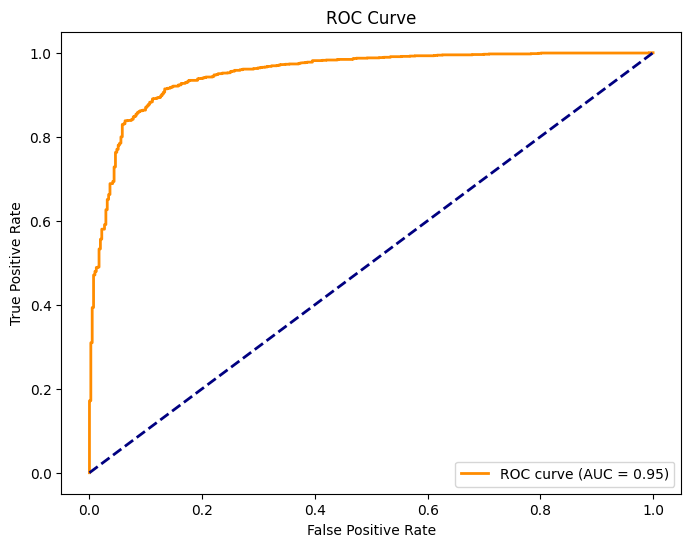

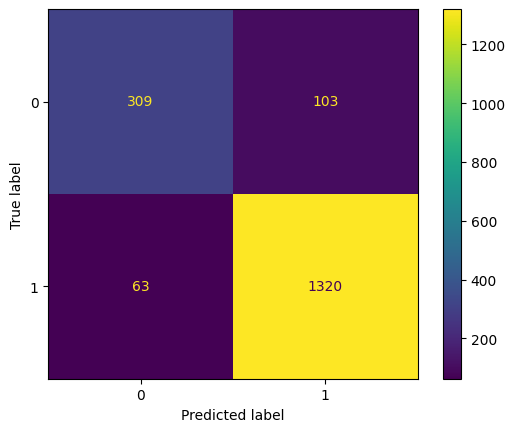

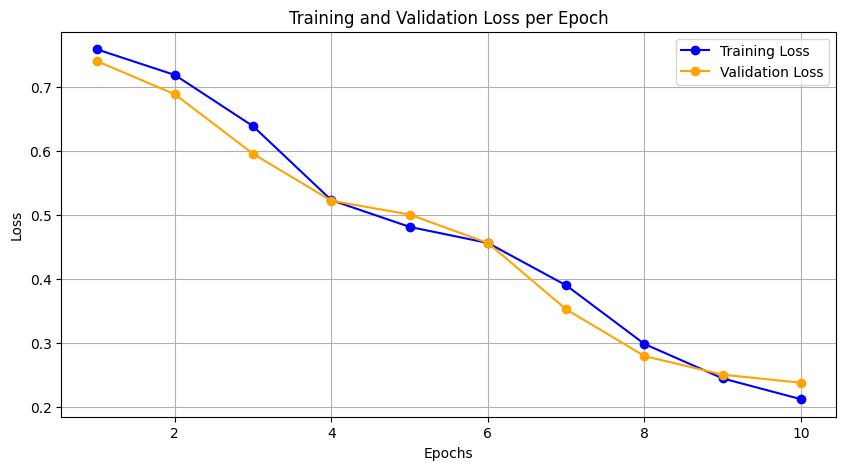

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
training_loss = [0.758400, 0.718300, 0.638400, 0.523100, 0.481400, 0.456300, 0.390200, 0.298800, 0.245100, 0.212700]
validation_loss = [0.740135, 0.688180, 0.595255, 0.522240, 0.500665, 0.456222, 0.352829, 0.279959, 0.250993, 0.238371]
epochs = [1,2,3,4,5,6,7,8,9,10]


# ROC eğrisi ve AUC hesaplama
fpr, tpr, _ = roc_curve(labels, logits[:, 1])
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


ConfusionMatrixDisplay.from_predictions(labels, predicted_labels)

# Kayıp grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label="Training Loss", marker='o', color='blue')
plt.plot(epochs, validation_loss, label="Validation Loss", marker='o', color='orange')
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



In [ ]:
import torch

# Cihazı kontrol et
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modeli cihaz üzerine taşıma
model.to(device)
label_map = {0: 'negative', 1: 'positive'}


# Eğitilmiş modeli yükleyin
model = DistilBertForSequenceClassification.from_pretrained('/content/drive/MyDrive/models/distilbert_model')
tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/models/distilbert1_model')
model.to(device)
# Metin için sentiment tahmini
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=-1)
    predicted_class = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][predicted_class].item()
    return label_map[predicted_class],confidence

# Tahmin sonuçları
df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))
df_2023_2025.to_csv('/content/df_2021_2025_with_sentimentaldistilbert.csv', index=False)


<ipython-input-87-2134d959abc3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))
<ipython-input-87-2134d959abc3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))


In [ ]:
df_2023_2025

,Unique,created_utc,Date,cleaned_text,Sentiment,Confidence
12078,My first ETH staking payout of the New Year!!!...,2023-01-01 18:58:05,2023-01-01,first eth staking payout new year lfg glta,positive,0.970869
14289,How ethereum has been made from scratch ?,2023-01-01 14:23:04,2023-01-01,ethereum made scratch,positive,0.962510
5487,Ready for 2023...,2023-01-01 01:05:33,2023-01-01,ready,positive,0.956168
8544,Staking rewards 2021 & 2022. Let’s go 2023!,2023-01-01 20:30:31,2023-01-01,staking rewards lets go,positive,0.977695
37186,how vitalik code ethereum in a low programming...,2023-01-01 14:23:04,2023-01-01,vitalik code ethereum low programming language...,negative,0.593538
...,...,...,...,...,...,...
17426,NY Attorney General files lawsuit to recoup $2...,2025-01-12 05:34:47,2025-01-12,ny attorney general files lawsuit recoup crypt...,negative,0.900927
17427,Ethtrader Macro Update: Weekly ETF Recap and W...,2025-01-12 04:59:41,2025-01-12,ethtrader macro update weekly etf recap week a...,positive,0.970679
17428,"Can The Ethereum Price Rebound To $4,000 This ...",2025-01-12 03:09:30,2025-01-12,ethereum price rebound january,positive,0.935872
17422,A continuación.,2025-01-12 07:22:10,2025-01-12,continuacin,positive,0.874745


In [ ]:
price_df_path = '/content/drive/My Drive/price.csv'
price_df = pd.read_csv(price_df_path)

# Tarih sütununu datetime formatına dönüştürelim
price_df['Open Time'] = pd.to_datetime(price_df['Open Time'])
price_df['Open Time'] = price_df['Open Time'].dt.date

# Tarih sütununa göre sıralama yapalım (küçükten büyüğe)
price_df = price_df.sort_values(by='Open Time')

price_df["Price Difference"] = price_df["Close"] - price_df["Open"]

# Sonuçları kontrol edelim
price_df.head()#2017-08-17 2024-12-26

,Open Time,Open,High,Low,Close,Volume,Price Difference
0,2017-08-17,301.13,302.57,298.00,301.61,125.66877,0.48
19,2017-08-17,306.74,310.85,302.00,302.00,229.60620,-4.74
18,2017-08-17,308.57,310.74,303.44,306.74,368.36785,-1.83
17,2017-08-17,304.79,309.40,304.04,307.44,330.54526,2.65
16,2017-08-17,301.60,309.40,299.01,304.79,272.42251,3.19


In [ ]:
# `cleaned_text`'i temizleyelim (boş satırlar varsa silelim)
df_2023_2025 = df_2023_2025.dropna(subset=['cleaned_text'])

# Tarih sütunlarını datetime formatına dönüştürelim
df_2023_2025['Date'] = pd.to_datetime(df_2023_2025['Date'])
price_df['Open Time'] = pd.to_datetime(price_df['Open Time'])

# Sadece aynı tarihlerde ve `cleaned_text` verisi eşleşen satırları birleştirelim (inner join)
merged_df = pd.merge(df_2023_2025, price_df, left_on='Date', right_on='Open Time', how='inner')

# Sonuçları kontrol edelim

merged_df = merged_df.drop_duplicates(subset=['cleaned_text'])

merged_df['Price Direction'] = merged_df['Price Difference'].apply(lambda x: 1 if x > 0 else 0)

merged_df.tail()

,Unique,created_utc,Date,cleaned_text,Sentiment,Confidence,Open Time,Open,High,Low,Close,Volume,Price Difference,Price Direction
353921,If you're considering selling then a word of a...,2024-12-26 19:57:29,2024-12-26,youre considering selling word advice dont wou...,positive,0.547748,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353945,So for the past month I’ve been trying everyth...,2024-12-26 03:57:02,2024-12-26,past month ive trying everything obtain etheri...,positive,0.981448,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353969,Today I did a quick research on prediction mar...,2024-12-26 13:18:18,2024-12-26,today quick research prediction markets see th...,positive,0.985279,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353993,Help me obtain ethereium,2024-12-26 03:57:02,2024-12-26,help obtain ethereium,positive,0.968351,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
354017,Good day legends! 🤩 \n\n## Asia Update\n\nJapa...,2024-12-26 15:10:35,2024-12-26,good day legends asia update japans government...,positive,0.983296,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0


In [ ]:
silinecek_sutunlar = ["Unique", "created_utc"]

# Sütunları silme işlemi
merged_df1 = merged_df.drop(columns=silinecek_sutunlar)

In [ ]:
merged_df1['Sentiment'] = merged_df1['Sentiment'].map({'negative': -1, 'positive': 1})
merged_df1.head(15)

,Date,cleaned_text,Sentiment,Confidence,Open Time,Open,High,Low,Close,Volume,Price Difference,Price Direction
0,2023-01-01,first eth staking payout new year lfg glta,1,0.970869,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
24,2023-01-01,ethereum made scratch,1,0.962510,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
48,2023-01-01,ready,1,0.956168,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
72,2023-01-01,staking rewards lets go,1,0.977695,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
96,2023-01-01,vitalik code ethereum low programming language...,-1,0.593538,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
120,2023-01-01,since staking eth last year date ive earned et...,1,0.979788,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
144,2023-01-02,make see nfts opensea,1,0.972207,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
168,2023-01-02,ethereum sticky developers million commits sub...,1,0.535841,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
192,2023-01-02,tickets blockchain fix,1,0.842485,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
216,2023-01-03,said last month start year eth staked currentl...,1,0.982050,2023-01-03,1216.40,1219.24,1206.00,1210.33,26626.7998,-6.07,0


In [ ]:
merged_df1cop = merged_df1.groupby("Date", as_index=False)["Sentiment"].mean()
merged_df1cop

,Date,Sentiment
0,2023-01-01,0.666667
1,2023-01-02,1.000000
2,2023-01-03,1.000000
3,2023-01-04,1.000000
4,2023-01-05,0.714286
...,...,...
719,2024-12-22,0.482759
720,2024-12-23,0.623188
721,2024-12-24,0.484848
722,2024-12-25,0.592593


In [ ]:
merged_d2f1cop = merged_df1.groupby("Date", as_index=False)["Confidence"].mean()
merged_d2f1cop

,Date,Confidence
0,2023-01-01,0.906761
1,2023-01-02,0.783511
2,2023-01-03,0.911410
3,2023-01-04,0.977469
4,2023-01-05,0.920625
...,...,...
719,2024-12-22,0.865639
720,2024-12-23,0.909125
721,2024-12-24,0.861652
722,2024-12-25,0.894378


In [ ]:
df = merged_df1cop

In [ ]:
df = merged_df1[['Date','Open','Close','Volume']]

In [ ]:
df = df.drop_duplicates()

In [ ]:
# İki DataFrame'i birleştirme
merged_dfcs = pd.merge(merged_df1cop, merged_d2f1cop, on='Date', how='inner')
merged_dfcs =merged_dfcs.drop_duplicates()
merged_dfcs

,Date,Sentiment,Confidence
0,2023-01-01,0.666667,0.906761
1,2023-01-02,1.000000,0.783511
2,2023-01-03,1.000000,0.911410
3,2023-01-04,1.000000,0.977469
4,2023-01-05,0.714286,0.920625
...,...,...,...
719,2024-12-22,0.482759,0.865639
720,2024-12-23,0.623188,0.909125
721,2024-12-24,0.484848,0.861652
722,2024-12-25,0.592593,0.894378


In [ ]:
# İki DataFrame'i birleştirme
merged_dfcs = pd.merge(merged_dfcs, df, on='Date', how='inner')
merged_dfcs =merged_dfcs.drop_duplicates()
merged_dfcs

,Date,Sentiment,Confidence,Open,Close,Volume
0,2023-01-01,0.666667,0.906761,1197.16,1195.26,4804.4490
1,2023-01-02,1.000000,0.783511,1214.95,1216.78,9916.8659
2,2023-01-03,1.000000,0.911410,1216.40,1210.33,26626.7998
3,2023-01-04,1.000000,0.977469,1250.99,1253.72,7141.4744
4,2023-01-05,0.714286,0.920625,1252.91,1247.50,20901.5401
...,...,...,...,...,...,...
719,2024-12-22,0.482759,0.865639,3375.11,3370.97,13969.4647
720,2024-12-23,0.623188,0.909125,3349.07,3317.60,20883.6725
721,2024-12-24,0.484848,0.861652,3452.95,3455.91,27559.3590
722,2024-12-25,0.592593,0.894378,3482.57,3490.59,8613.9488


In [ ]:
aligned = 0
for idx in merged_df1.index:
        if merged_df1["Sentiment"][idx] > 0 and merged_df1["Price Direction"][idx] == 1:
            aligned += 1
        elif merged_df1["Sentiment"][idx] < 0 and merged_df1["Price Direction"][idx] == 0:
            aligned += 1
print(f"Movement prediction accuracy : " \
          f"{round(aligned/merged_df1.shape[0], 4)*100}%")

Movement prediction accuracy : 50.8%


In [ ]:
df3 = merged_df1[['Date','Confidence','Open','High','Low','Close', 'Price Difference', 'Price Direction']]

In [ ]:
df3

,Date,Confidence,Open,High,Low,Close,Price Difference,Price Direction
0,2023-01-01,0.970869,1197.16,1197.29,1193.54,1195.26,-1.90,0
24,2023-01-01,0.962510,1197.16,1197.29,1193.54,1195.26,-1.90,0
48,2023-01-01,0.956168,1197.16,1197.29,1193.54,1195.26,-1.90,0
72,2023-01-01,0.977695,1197.16,1197.29,1193.54,1195.26,-1.90,0
96,2023-01-01,0.593538,1197.16,1197.29,1193.54,1195.26,-1.90,0
...,...,...,...,...,...,...,...,...
353921,2024-12-26,0.547748,3358.01,3364.37,3336.80,3354.19,-3.82,0
353945,2024-12-26,0.981448,3358.01,3364.37,3336.80,3354.19,-3.82,0
353969,2024-12-26,0.985279,3358.01,3364.37,3336.80,3354.19,-3.82,0
353993,2024-12-26,0.968351,3358.01,3364.37,3336.80,3354.19,-3.82,0


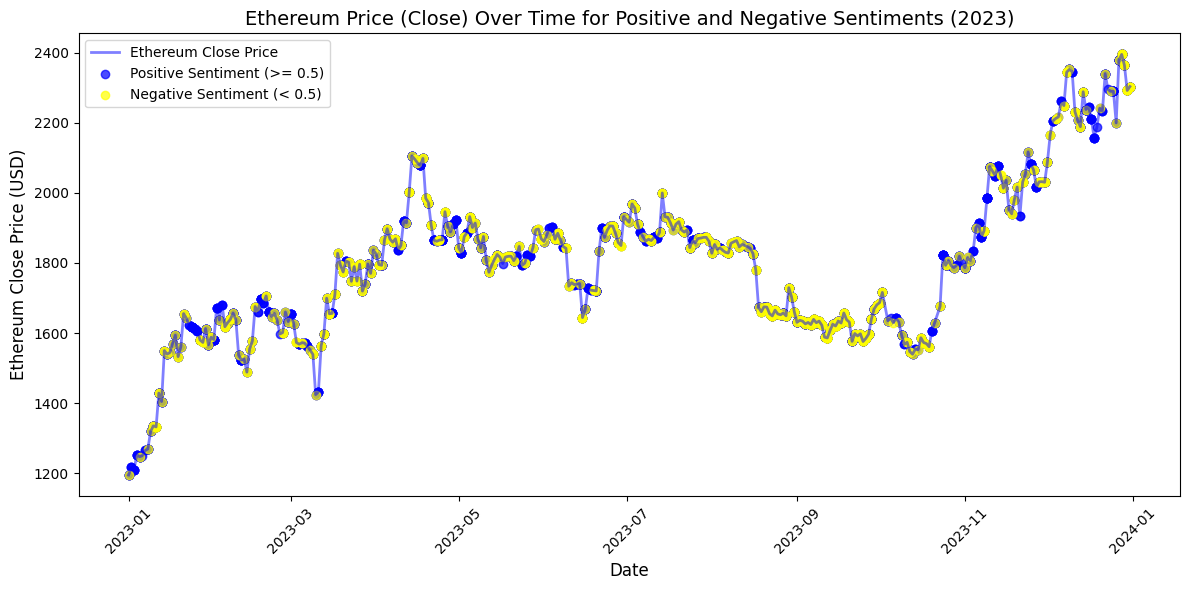

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df1' is the DataFrame containing the data

# Convert 'Date' to datetime if it's not already
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])

# Classify sentiment as positive (1) and negative (0) based on a threshold of 0.5
merged_df1['Sentiment Label'] = merged_df1['Sentiment'].apply(lambda x: 1 if x >= 0.5 else 0)

# Filter data for the year 2023
merged_df1 = merged_df1[merged_df1['Date'].dt.year == 2023]

# Plotting Ethereum price (Close) over time based on sentiment as scatter plot
plt.figure(figsize=(12,6))

# Plot normal Ethereum price (Close) over time as a line
plt.plot(merged_df1['Date'], merged_df1['Close'], label='Ethereum Close Price', color='blue', alpha=0.5, linewidth=2)

# Positive Sentiment (Sentiment >= 0.5)
positive_sentiment = merged_df1[merged_df1['Sentiment Label'] == 1]
plt.scatter(positive_sentiment['Date'], positive_sentiment['Close'], label='Positive Sentiment (>= 0.5)', color='blue', alpha=0.7)

# Negative Sentiment (Sentiment < 0.5)
negative_sentiment = merged_df1[merged_df1['Sentiment Label'] == 0]
plt.scatter(negative_sentiment['Date'], negative_sentiment['Close'], label='Negative Sentiment (< 0.5)', color='yellow', alpha=0.7)

# Adding labels and title
plt.title('Ethereum Price (Close) Over Time for Positive and Negative Sentiments (2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ethereum Close Price (USD)', fontsize=12)
plt.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = merged_dfcs
# Yön sütununu hesaplama
df['Direction'] = (df['Close'] > df['Open']).astype(int)

print(df)

          Date  Sentiment  Confidence     Open    Close      Volume  Direction
0   2023-01-01   0.666667    0.906761  1197.16  1195.26   4804.4490          0
1   2023-01-02   1.000000    0.783511  1214.95  1216.78   9916.8659          1
2   2023-01-03   1.000000    0.911410  1216.40  1210.33  26626.7998          0
3   2023-01-04   1.000000    0.977469  1250.99  1253.72   7141.4744          1
4   2023-01-05   0.714286    0.920625  1252.91  1247.50  20901.5401          0
..         ...        ...         ...      ...      ...         ...        ...
719 2024-12-22   0.482759    0.865639  3375.11  3370.97  13969.4647          0
720 2024-12-23   0.623188    0.909125  3349.07  3317.60  20883.6725          0
721 2024-12-24   0.484848    0.861652  3452.95  3455.91  27559.3590          1
722 2024-12-25   0.592593    0.894378  3482.57  3490.59   8613.9488          1
723 2024-12-26   0.593750    0.888730  3358.01  3354.19  16675.6435          0

[724 rows x 7 columns]


In [ ]:
train_data = df[df['Date'] < '2023-07-01']
test_data = df[df['Date'] >= '2023-07-01']

In [ ]:
# Eğitim ve test setlerinden özellik ve hedef sütunlarını ayırma
X_train = train_data[['Sentiment','Confidence', 'Volume']]
y_train = train_data['Direction']

X_test = test_data[['Sentiment','Confidence', 'Volume']]
y_test = test_data['Direction']

print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)


X_train:
     Sentiment  Confidence       Volume
0     0.666667    0.906761    4804.4490
1     1.000000    0.783511    9916.8659
2     1.000000    0.911410   26626.7998
3     1.000000    0.977469    7141.4744
4     0.714286    0.920625   20901.5401
..         ...         ...          ...
176   0.571429    0.951114   23474.3075
177   0.500000    0.865552   26396.8687
178   0.400000    0.903781   16301.5608
179  -0.500000    0.719980   19885.3587
180   0.846154    0.941233  114030.6735

[181 rows x 3 columns]

y_train:
0      0
1      1
2      0
3      1
4      0
      ..
176    1
177    1
178    1
179    0
180    1
Name: Direction, Length: 181, dtype: int64


In [ ]:
# Modeli oluşturma ve eğitme
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Başarı oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.46


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


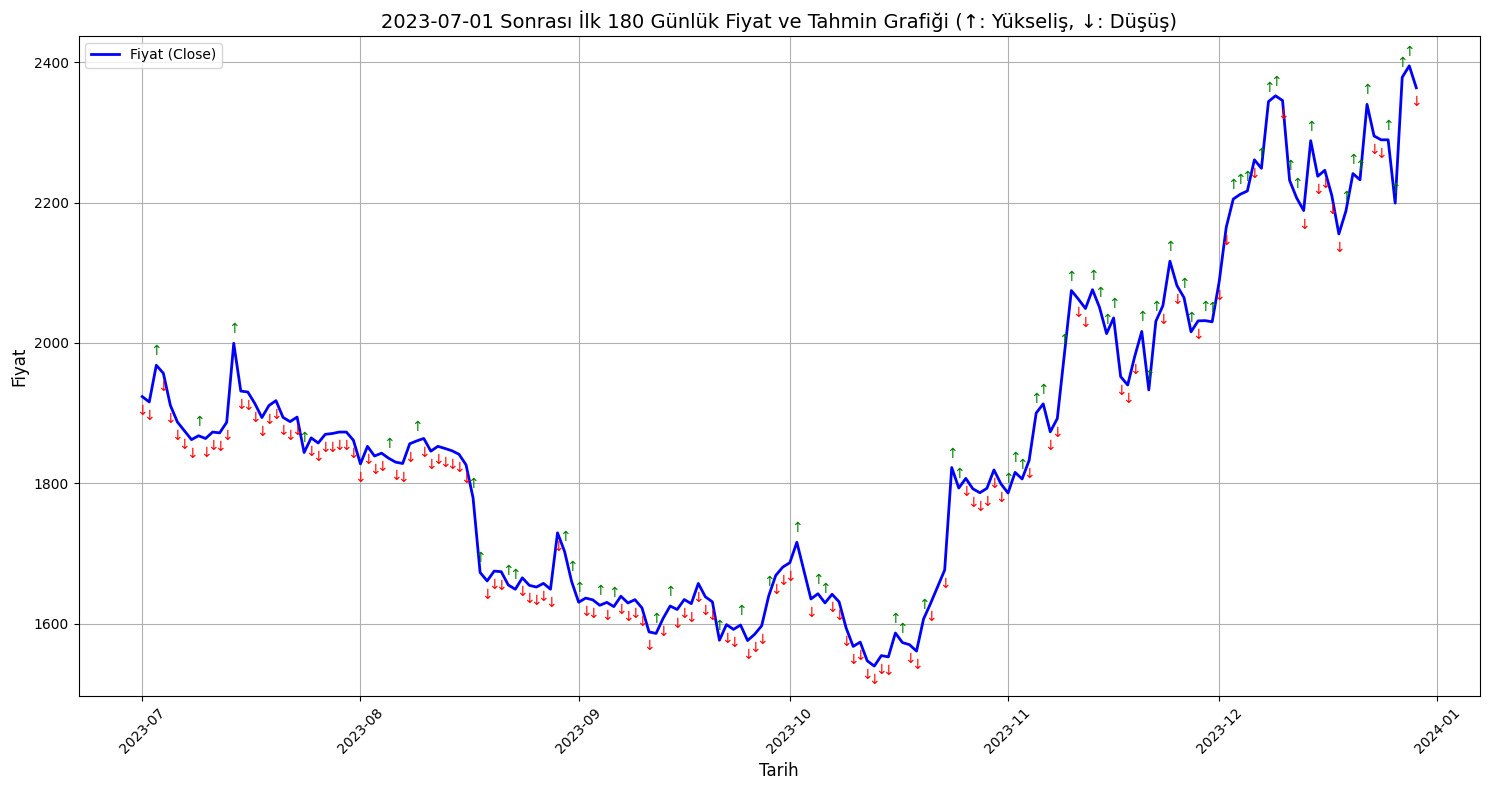

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tahmin sonuçlarını test veri setine ekleme
test_data = test_data.copy()  # Orijinal veriyi bozmamak için kopyalayın
test_data['Prediction'] = y_pred  # Tahminleri 'Prediction' sütununa ekle

# 2023-07-01 sonrası ilk 180 günü filtreleme
test_data_180 = test_data.head(180)  # İlk 180 günlük veriyi al

# Grafik oluşturma
plt.figure(figsize=(15, 8))

# Fiyat grafiği
plt.plot(test_data_180['Date'], test_data_180['Close'], label="Fiyat (Close)", color='blue', linewidth=2)

# Tahminlerin gösterimi
for i in range(len(test_data_180)):
    date = test_data_180['Date'].iloc[i]
    price = test_data_180['Close'].iloc[i]
    prediction = test_data_180['Prediction'].iloc[i]

    if prediction == 1:
        # Tahmin yükselişse "↑" işareti ekle
        plt.text(date, price + 10, '↑', color='green', fontsize=10, ha='center', va='bottom')
    else:
        # Tahmin düşüşse "↓" işareti ekle
        plt.text(date, price - 10, '↓', color='red', fontsize=10, ha='center', va='top')

# Grafik detayları
plt.title("2023-07-01 Sonrası İlk 180 Günlük Fiyat ve Tahmin Grafiği (↑: Yükseliş, ↓: Düşüş)", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Fiyat", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
print(test_data_180[['Date', 'Close', 'Prediction']].head(10))


          Date    Close  Prediction
181 2023-07-01  1923.50           0
182 2023-07-02  1915.87           0
183 2023-07-03  1968.17           1
184 2023-07-04  1956.78           0
185 2023-07-05  1911.00           0
186 2023-07-06  1887.25           0
187 2023-07-07  1874.62           0
188 2023-07-08  1862.21           0
189 2023-07-09  1867.74           1
190 2023-07-10  1863.80           0


# Albert

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AlbertForSequenceClassification
import torch

reddit_file_path = '/content/drive/My Drive/reddit.csv'

# 1. Reddit verilerini yükleme
reddit_df = pd.read_csv(reddit_file_path,index_col=0)
reddit_df

,Unique,created_utc
0,Which crypto is the best ???-> Setup,2024-12-26 10:25:05
1,Can I mine btc with an old gaming pc from 2017...,2024-12-23 13:55:49
2,Need a sticky,2024-12-20 18:53:34
3,Looking into mining crypto,2024-12-20 17:24:17
4,GPU Mining NEXA Is Over ASICs Online,2024-12-20 13:48:11
...,...,...
45804,I’m basically looking to automate my trading o...,2024-08-19 10:33:56
45805,"Hi,\n\nI have one running solo validator (Ligh...",2024-01-22 16:13:36
45806,"Hi, After some help. my validator has become u...",2024-01-21 02:21:58
45807,I have noticed a lot of airdrops for restaking...,2024-01-17 20:32:32


In [ ]:
# Tarih bilgisini reddit_df'ye ekleyelim
reddit_df['Date'] = reddit_df['created_utc']
# Tarih sütununu datetime formatına dönüştürelim
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])
reddit_df['Date'] = reddit_df['Date'].dt.date
# Tarih sütununa göre sıralama yapalım (küçükten büyüğe)
reddit_df = reddit_df.sort_values(by='Date')

# Sonuçları kontrol edelim
reddit_df

,Unique,created_utc,Date
44731,It amazes me that people over at /r/ethtrader ...,2016-02-17 20:12:14,2016-02-17
45199,What are the key performance indicators that p...,2016-02-17 22:27:30,2016-02-17
45135,Here are a few things that I think Ethereum ne...,2016-02-17 20:10:15,2016-02-17
22295,"Augur beta is 100%, ready for security testing...",2016-02-17 17:02:36,2016-02-17
22294,Key Performance Indicators for Long-Term Inves...,2016-02-17 22:27:30,2016-02-17
...,...,...,...
17426,NY Attorney General files lawsuit to recoup $2...,2025-01-12 05:34:47,2025-01-12
17427,Ethtrader Macro Update: Weekly ETF Recap and W...,2025-01-12 04:59:41,2025-01-12
17428,"Can The Ethereum Price Rebound To $4,000 This ...",2025-01-12 03:09:30,2025-01-12
17422,A continuación.,2025-01-12 07:22:10,2025-01-12


In [ ]:
reddit_df
import pandas as pd

# 'Date' sütununu datetime formatına dönüştürme
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])

# 2017-2021 ve 2021-2025 arası verileri ayırma
df_2017_2022 = reddit_df[reddit_df['Date'].dt.year <= 2022]
df_2023_2025 = reddit_df[reddit_df['Date'].dt.year > 2022]

# Sonuçları kontrol etme
print(df_2017_2022.head())
print(df_2023_2025.head())


                                                  Unique          created_utc  \
44731  It amazes me that people over at /r/ethtrader ...  2016-02-17 20:12:14   
45199  What are the key performance indicators that p...  2016-02-17 22:27:30   
45135  Here are a few things that I think Ethereum ne...  2016-02-17 20:10:15   
22295  Augur beta is 100%, ready for security testing...  2016-02-17 17:02:36   
22294  Key Performance Indicators for Long-Term Inves...  2016-02-17 22:27:30   

            Date  
44731 2016-02-17  
45199 2016-02-17  
45135 2016-02-17  
22295 2016-02-17  
22294 2016-02-17  
                                                  Unique          created_utc  \
12078  My first ETH staking payout of the New Year!!!...  2023-01-01 18:58:05   
14289          How ethereum has been made from scratch ?  2023-01-01 14:23:04   
5487                                   Ready for 2023...  2023-01-01 01:05:33   
8544         Staking rewards 2021 & 2022. Let’s go 2023!  2023-01-01 20:30:

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import drive

In [ ]:
# nltk indirmeleriimport nltk
nltk.download('all')
nltk.download('punkt')  # Punkt tokenizer'ı indirir
nltk.download('stopwords')
nltk.download('punkt')


# İngilizce stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Metni küçük harfe çevirme
    text = text.lower()
    # Link ve özel karakterleri kaldırma
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize etme ve stopwords temizleme
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Reddit metinlerine temizlik uygulama
reddit_df['cleaned_text'] = reddit_df['Unique'].fillna('').apply(clean_text)
df_2017_2022['cleaned_text'] = df_2017_2022['Unique'].fillna('').apply(clean_text)
df_2023_2025['cleaned_text'] = df_2023_2025['Unique'].fillna('').apply(clean_text)

# İlk temizlenmiş metinlere bakalım
print(df_2017_2022[['Unique', 'cleaned_text']].head())


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

                                                  Unique  \
44731  It amazes me that people over at /r/ethtrader ...   
45199  What are the key performance indicators that p...   
45135  Here are a few things that I think Ethereum ne...   
22295  Augur beta is 100%, ready for security testing...   
22294  Key Performance Indicators for Long-Term Inves...   

                                            cleaned_text  
44731  amazes people rethtrader treating like kind ge...  
45199  key performance indicators people following ad...  
45135  things think ethereum needs thrive top head di...  
22295            augur beta ready security testing stage  
22294      key performance indicators longterm investors  


<ipython-input-205-ff1ff20f8628>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['cleaned_text'] = df_2023_2025['Unique'].fillna('').apply(clean_text)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER analizörü
analyzer = SentimentIntensityAnalyzer()

# Duygu skorlarını hesaplama
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Genel duygu skorunu döndür

df_2017_2022['compound_score'] = df_2017_2022['cleaned_text'].apply(analyze_sentiment)


<ipython-input-206-a3c99db40fea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['compound_score'] = df_2017_2022['cleaned_text'].apply(analyze_sentiment)


In [ ]:
def sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'


df_2017_2022['sentiment'] = df_2017_2022['compound_score'].apply(sentiment_label)
df_2017_2022 = df_2017_2022[df_2017_2022['sentiment'].notna()]
df_2017_2022.head()

reddit_DF = reddit_df.copy()

<ipython-input-207-86a008776da5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['sentiment'] = df_2017_2022['compound_score'].apply(sentiment_label)


In [ ]:
from transformers import  Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
from torch.utils.data import Dataset

# Sadece gerekli sütunları seçin
# "Unique" -> Metin; "Sentiment" -> Etiket (Eğitim verisinde duygular belli olmalı)
df_2017_2022 = df_2017_2022[['cleaned_text', 'sentiment']]

# 2. Etiketleri sayısallaştırma
label_map = {"negative": 0, "positive": 1}
df_2017_2022['sentiment'] = df_2017_2022['sentiment'].map(label_map)
print(df_2017_2022)
# 3. Eğitim ve test verisi oluşturma
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_2017_2022['cleaned_text'], df_2017_2022['sentiment'], test_size=0.2, random_state=42
)

                                            cleaned_text  sentiment
44731  amazes people rethtrader treating like kind ge...          1
45135  things think ethereum needs thrive top head di...          1
22295            augur beta ready security testing stage          1
44480  conversation much different certain parties re...          1
21575                               think sub great idea          1
...                                                  ...        ...
13935  top evm blockchain networks terms transactions...          1
13933                     ethereum miner super connector          1
33248  would like initiate thread express gratitude e...          1
36831  early eth tvl miner super connector tg twitter...          1
36832  sometimes lose sight user experience like noob...          1

[8972 rows x 2 columns]


In [ ]:
pip install evaluate

In [ ]:
class RedditDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Tokenizer'ı yükleme
tokenizer = AutoTokenizer.from_pretrained("textattack/albert-base-v2-imdb", num_labels = 2)
# Dataset'leri oluşturma
train_dataset = RedditDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_length=128)
val_dataset = RedditDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_length=128)


In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score
)
from transformers import  Trainer, TrainingArguments
from evaluate import load
import time
import numpy as np
import matplotlib.pyplot as plt

# Modeli yükleme
model = AlbertForSequenceClassification.from_pretrained("textattack/albert-base-v2-imdb", num_labels=2)
# Eğitim parametreleri
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/models/albert_model11',
    num_train_epochs=10,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    dataloader_num_workers=12,
    learning_rate=2e-6
)

# Metrikleri tanımlama
accuracy_metric = load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')  # Sensitivity
    specificity = recall_score(labels, predictions, pos_label=0)  # Specificity
    f1 = f1_score(labels, predictions, average='binary')
    auc_value = roc_auc_score(labels, logits[:, 1])
    return {
        "accuracy": accuracy["accuracy"],
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1": f1,
        "auc": auc_value
    }

# Trainer'ı oluşturma
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Eğitim zamanı ölçümü
start_time = time.time()
trainer.train()
training_time = time.time() - start_time

# Modeli kaydetme
model.save_pretrained('/content/drive/MyDrive/models/albert_model')
tokenizer.save_pretrained('/content/drive/MyDrive/models/albert1_model')

print(f"Model eğitimi tamamlandı! Eğitim süresi: {training_time:.2f} saniye")

# Çıkarım zamanı ölçümü
start_time = time.time()
predictions = trainer.predict(val_dataset)
inference_time = time.time() - start_time

# Çıkarım süresini yazdırma
print(f"Model çıkarımı tamamlandı! Çıkarım süresi: {inference_time:.2f} saniye")

# Tahminler ve metrikler
logits, labels = predictions.predictions, predictions.label_ids
predicted_labels = np.argmax(logits, axis=-1)



/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-211-011a2fa13eca>:61: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall (sensitivity),Specificity,F1,Auc
1,0.731900,0.696491,0.662396,0.810056,0.733912,0.422330,0.770106,0.652462
2,0.618400,0.593795,0.725348,0.802310,0.853941,0.293689,0.827320,0.667227
3,0.496300,0.543481,0.761003,0.794808,0.929863,0.194175,0.857048,0.686172
4,0.474600,0.518079,0.769359,0.797422,0.939262,0.199029,0.862550,0.703547
5,0.435100,0.495869,0.774373,0.804863,0.933478,0.240291,0.864412,0.727032
6,0.418100,0.472606,0.778830,0.809285,0.932755,0.262136,0.866644,0.757434
7,0.401700,0.448914,0.796657,0.826282,0.932032,0.342233,0.875977,0.783296
8,0.365000,0.428105,0.809471,0.839530,0.930586,0.402913,0.882716,0.804872
9,0.337700,0.411472,0.821170,0.847969,0.935647,0.436893,0.889653,0.822308
10,0.336400,0.397864,0.829526,0.850814,0.944324,0.444175,0.895134,0.836749


Model eğitimi tamamlandı! Eğitim süresi: 382.40 saniye


Model çıkarımı tamamlandı! Çıkarım süresi: 3.78 saniye


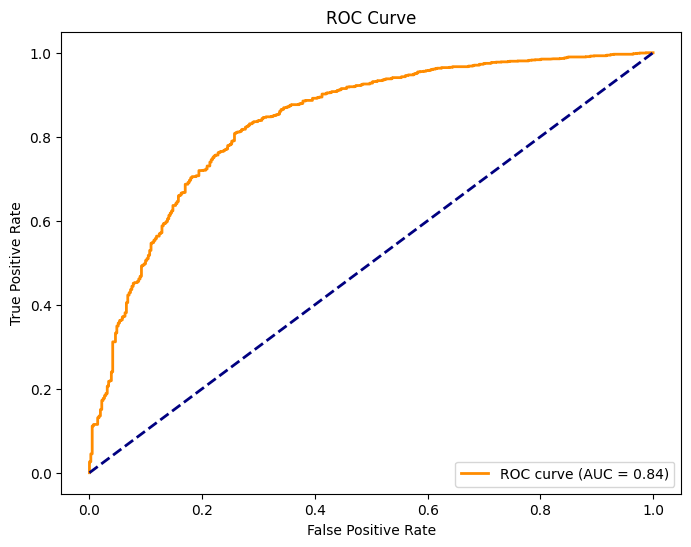

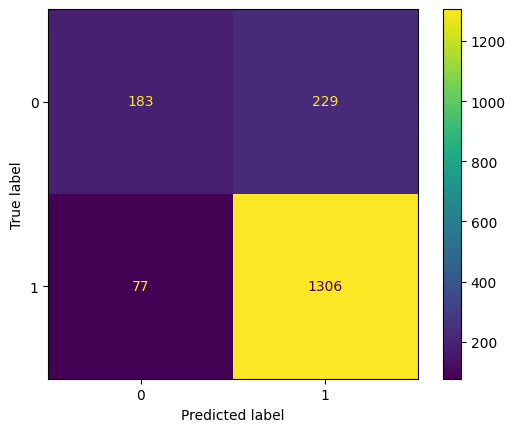

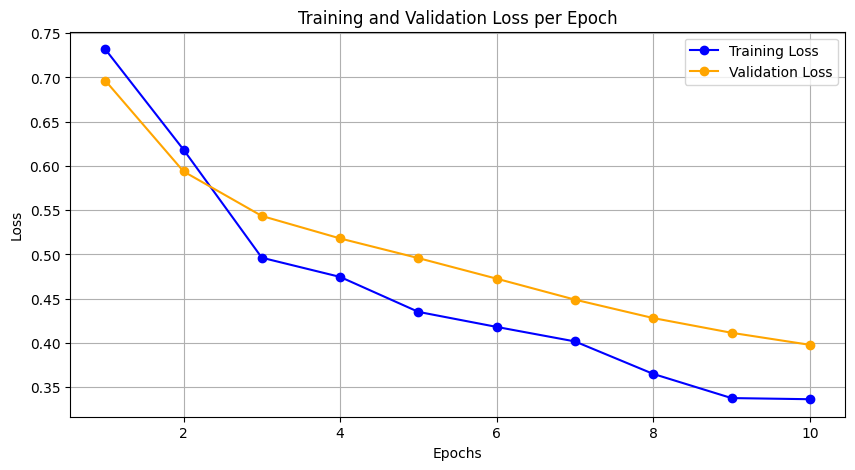

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
training_loss = [0.731900, 0.618400, 0.496300, 0.474600, 0.435100, 0.418100, 0.401700, 0.365000, 0.337700, 0.336400]
validation_loss = [0.696491, 0.593795, 0.543481, 0.518079, 0.495869, 0.472606, 0.448914, 0.428105, 0.411472, 0.397864]


epochs = [1,2,3,4,5,6,7,8,9,10]


# ROC eğrisi ve AUC hesaplama
fpr, tpr, _ = roc_curve(labels, logits[:, 1])
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


ConfusionMatrixDisplay.from_predictions(labels, predicted_labels)

# Kayıp grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label="Training Loss", marker='o', color='blue')
plt.plot(epochs, validation_loss, label="Validation Loss", marker='o', color='orange')
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



In [ ]:
import torch

# Cihazı kontrol et
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modeli cihaz üzerine taşıma
model.to(device)
label_map = {0: 'negative', 1: 'positive'}


# Eğitilmiş modeli yükleyin
model = AlbertForSequenceClassification.from_pretrained('/content/drive/MyDrive/models/albert_model')
tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/models/albert1_model')
model.to(device)
# Metin için sentiment tahmini
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=-1)
    predicted_class = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][predicted_class].item()
    return label_map[predicted_class],confidence

# Tahmin sonuçları
df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))
df_2023_2025.to_csv('/content/df_2021_2025_with_sentimentalalbert.csv', index=False)


<ipython-input-213-e16bdc40d927>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))
<ipython-input-213-e16bdc40d927>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))


In [ ]:
df_2023_2025

,Unique,created_utc,Date,cleaned_text,Sentiment,Confidence
12078,My first ETH staking payout of the New Year!!!...,2023-01-01 18:58:05,2023-01-01,first eth staking payout new year lfg glta,positive,0.622658
14289,How ethereum has been made from scratch ?,2023-01-01 14:23:04,2023-01-01,ethereum made scratch,positive,0.839328
5487,Ready for 2023...,2023-01-01 01:05:33,2023-01-01,ready,positive,0.874815
8544,Staking rewards 2021 & 2022. Let’s go 2023!,2023-01-01 20:30:31,2023-01-01,staking rewards lets go,positive,0.869502
37186,how vitalik code ethereum in a low programming...,2023-01-01 14:23:04,2023-01-01,vitalik code ethereum low programming language...,positive,0.799030
...,...,...,...,...,...,...
17426,NY Attorney General files lawsuit to recoup $2...,2025-01-12 05:34:47,2025-01-12,ny attorney general files lawsuit recoup crypt...,negative,0.791925
17427,Ethtrader Macro Update: Weekly ETF Recap and W...,2025-01-12 04:59:41,2025-01-12,ethtrader macro update weekly etf recap week a...,positive,0.942293
17428,"Can The Ethereum Price Rebound To $4,000 This ...",2025-01-12 03:09:30,2025-01-12,ethereum price rebound january,positive,0.759218
17422,A continuación.,2025-01-12 07:22:10,2025-01-12,continuacin,negative,0.637434


In [ ]:
price_df_path = '/content/drive/My Drive/price.csv'
price_df = pd.read_csv(price_df_path)

# Tarih sütununu datetime formatına dönüştürelim
price_df['Open Time'] = pd.to_datetime(price_df['Open Time'])
price_df['Open Time'] = price_df['Open Time'].dt.date

# Tarih sütununa göre sıralama yapalım (küçükten büyüğe)
price_df = price_df.sort_values(by='Open Time')

price_df["Price Difference"] = price_df["Close"] - price_df["Open"]

# Sonuçları kontrol edelim
price_df.head()#2017-08-17 2024-12-26

,Open Time,Open,High,Low,Close,Volume,Price Difference
0,2017-08-17,301.13,302.57,298.00,301.61,125.66877,0.48
19,2017-08-17,306.74,310.85,302.00,302.00,229.60620,-4.74
18,2017-08-17,308.57,310.74,303.44,306.74,368.36785,-1.83
17,2017-08-17,304.79,309.40,304.04,307.44,330.54526,2.65
16,2017-08-17,301.60,309.40,299.01,304.79,272.42251,3.19


In [ ]:
# `cleaned_text`'i temizleyelim (boş satırlar varsa silelim)
df_2023_2025 = df_2023_2025.dropna(subset=['cleaned_text'])

# Tarih sütunlarını datetime formatına dönüştürelim
df_2023_2025['Date'] = pd.to_datetime(df_2023_2025['Date'])
price_df['Open Time'] = pd.to_datetime(price_df['Open Time'])

# Sadece aynı tarihlerde ve `cleaned_text` verisi eşleşen satırları birleştirelim (inner join)
merged_df = pd.merge(df_2023_2025, price_df, left_on='Date', right_on='Open Time', how='inner')

# Sonuçları kontrol edelim

merged_df = merged_df.drop_duplicates(subset=['cleaned_text'])

merged_df['Price Direction'] = merged_df['Price Difference'].apply(lambda x: 1 if x > 0 else 0)

merged_df.tail()

<ipython-input-216-cf913a066dd3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Price Direction'] = merged_df['Price Difference'].apply(lambda x: 1 if x > 0 else 0)


,Unique,created_utc,Date,cleaned_text,Sentiment,Confidence,Open Time,Open,High,Low,Close,Volume,Price Difference,Price Direction
353921,If you're considering selling then a word of a...,2024-12-26 19:57:29,2024-12-26,youre considering selling word advice dont wou...,positive,0.910400,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353945,So for the past month I’ve been trying everyth...,2024-12-26 03:57:02,2024-12-26,past month ive trying everything obtain etheri...,positive,0.859943,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353969,Today I did a quick research on prediction mar...,2024-12-26 13:18:18,2024-12-26,today quick research prediction markets see th...,positive,0.993026,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353993,Help me obtain ethereium,2024-12-26 03:57:02,2024-12-26,help obtain ethereium,positive,0.940262,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
354017,Good day legends! 🤩 \n\n## Asia Update\n\nJapa...,2024-12-26 15:10:35,2024-12-26,good day legends asia update japans government...,positive,0.920556,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0


In [ ]:
silinecek_sutunlar = ["Unique", "created_utc"]

# Sütunları silme işlemi
merged_df1 = merged_df.drop(columns=silinecek_sutunlar)

In [ ]:
merged_df1['Sentiment'] = merged_df1['Sentiment'].map({'negative': -1, 'positive': 1})
merged_df1.head(15)

,Date,cleaned_text,Sentiment,Confidence,Open Time,Open,High,Low,Close,Volume,Price Difference,Price Direction
0,2023-01-01,first eth staking payout new year lfg glta,1,0.622658,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
24,2023-01-01,ethereum made scratch,1,0.839328,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
48,2023-01-01,ready,1,0.874815,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
72,2023-01-01,staking rewards lets go,1,0.869502,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
96,2023-01-01,vitalik code ethereum low programming language...,1,0.799030,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
120,2023-01-01,since staking eth last year date ive earned et...,1,0.995120,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
144,2023-01-02,make see nfts opensea,1,0.988225,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
168,2023-01-02,ethereum sticky developers million commits sub...,-1,0.827484,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
192,2023-01-02,tickets blockchain fix,1,0.792982,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
216,2023-01-03,said last month start year eth staked currentl...,1,0.954434,2023-01-03,1216.40,1219.24,1206.00,1210.33,26626.7998,-6.07,0


In [ ]:
merged_df1cop = merged_df1.groupby("Date", as_index=False)["Sentiment"].mean()
merged_df1cop

,Date,Sentiment
0,2023-01-01,1.000000
1,2023-01-02,0.333333
2,2023-01-03,0.600000
3,2023-01-04,1.000000
4,2023-01-05,0.428571
...,...,...
719,2024-12-22,0.448276
720,2024-12-23,0.478261
721,2024-12-24,0.575758
722,2024-12-25,0.629630


In [ ]:
merged_d2f1cop = merged_df1.groupby("Date", as_index=False)["Confidence"].mean()
merged_d2f1cop

,Date,Confidence
0,2023-01-01,0.833409
1,2023-01-02,0.869564
2,2023-01-03,0.806338
3,2023-01-04,0.787076
4,2023-01-05,0.818615
...,...,...
719,2024-12-22,0.807957
720,2024-12-23,0.849614
721,2024-12-24,0.818470
722,2024-12-25,0.844351


In [ ]:
df = merged_df1cop

In [ ]:
df = merged_df1[['Date','Open','Close','Volume']]

In [ ]:
df = df.drop_duplicates()

In [ ]:
# İki DataFrame'i birleştirme
merged_dfcs = pd.merge(merged_df1cop, merged_d2f1cop, on='Date', how='inner')
merged_dfcs =merged_dfcs.drop_duplicates()
merged_dfcs

,Date,Sentiment,Confidence
0,2023-01-01,1.000000,0.833409
1,2023-01-02,0.333333,0.869564
2,2023-01-03,0.600000,0.806338
3,2023-01-04,1.000000,0.787076
4,2023-01-05,0.428571,0.818615
...,...,...,...
719,2024-12-22,0.448276,0.807957
720,2024-12-23,0.478261,0.849614
721,2024-12-24,0.575758,0.818470
722,2024-12-25,0.629630,0.844351


In [ ]:
# İki DataFrame'i birleştirme
merged_dfcs = pd.merge(merged_dfcs, df, on='Date', how='inner')
merged_dfcs =merged_dfcs.drop_duplicates()
merged_dfcs

,Date,Sentiment,Confidence,Open,Close,Volume
0,2023-01-01,1.000000,0.833409,1197.16,1195.26,4804.4490
1,2023-01-02,0.333333,0.869564,1214.95,1216.78,9916.8659
2,2023-01-03,0.600000,0.806338,1216.40,1210.33,26626.7998
3,2023-01-04,1.000000,0.787076,1250.99,1253.72,7141.4744
4,2023-01-05,0.428571,0.818615,1252.91,1247.50,20901.5401
...,...,...,...,...,...,...
719,2024-12-22,0.448276,0.807957,3375.11,3370.97,13969.4647
720,2024-12-23,0.478261,0.849614,3349.07,3317.60,20883.6725
721,2024-12-24,0.575758,0.818470,3452.95,3455.91,27559.3590
722,2024-12-25,0.629630,0.844351,3482.57,3490.59,8613.9488


In [ ]:
aligned = 0
for idx in merged_df1.index:
        if merged_df1["Sentiment"][idx] > 0 and merged_df1["Price Direction"][idx] == 1:
            aligned += 1
        elif merged_df1["Sentiment"][idx] < 0 and merged_df1["Price Direction"][idx] == 0:
            aligned += 1
print(f"Movement prediction accuracy : " \
          f"{round(aligned/merged_df1.shape[0], 4)*100}%")

Movement prediction accuracy : 50.96000000000001%


In [ ]:
df3 = merged_df1[['Date','Confidence','Open','High','Low','Close', 'Price Difference', 'Price Direction']]

In [ ]:
df3

,Date,Confidence,Open,High,Low,Close,Price Difference,Price Direction
0,2023-01-01,0.622658,1197.16,1197.29,1193.54,1195.26,-1.90,0
24,2023-01-01,0.839328,1197.16,1197.29,1193.54,1195.26,-1.90,0
48,2023-01-01,0.874815,1197.16,1197.29,1193.54,1195.26,-1.90,0
72,2023-01-01,0.869502,1197.16,1197.29,1193.54,1195.26,-1.90,0
96,2023-01-01,0.799030,1197.16,1197.29,1193.54,1195.26,-1.90,0
...,...,...,...,...,...,...,...,...
353921,2024-12-26,0.910400,3358.01,3364.37,3336.80,3354.19,-3.82,0
353945,2024-12-26,0.859943,3358.01,3364.37,3336.80,3354.19,-3.82,0
353969,2024-12-26,0.993026,3358.01,3364.37,3336.80,3354.19,-3.82,0
353993,2024-12-26,0.940262,3358.01,3364.37,3336.80,3354.19,-3.82,0


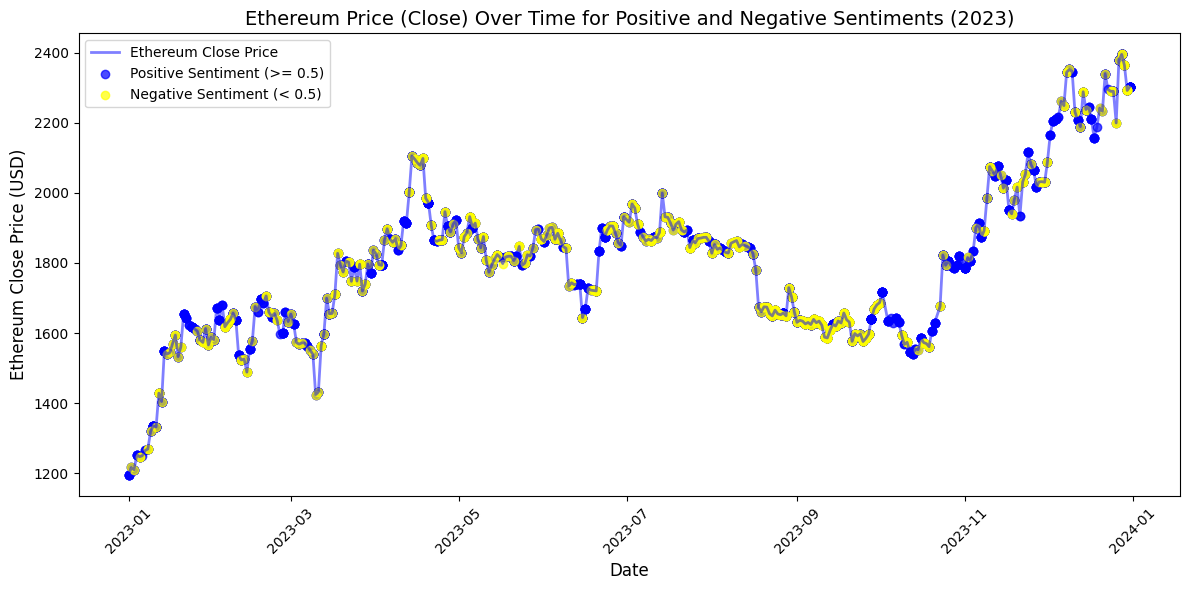

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df1' is the DataFrame containing the data

# Convert 'Date' to datetime if it's not already
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])

# Classify sentiment as positive (1) and negative (0) based on a threshold of 0.5
merged_df1['Sentiment Label'] = merged_df1['Sentiment'].apply(lambda x: 1 if x >= 0.5 else 0)

# Filter data for the year 2023
merged_df1 = merged_df1[merged_df1['Date'].dt.year == 2023]

# Plotting Ethereum price (Close) over time based on sentiment as scatter plot
plt.figure(figsize=(12,6))

# Plot normal Ethereum price (Close) over time as a line
plt.plot(merged_df1['Date'], merged_df1['Close'], label='Ethereum Close Price', color='blue', alpha=0.5, linewidth=2)

# Positive Sentiment (Sentiment >= 0.5)
positive_sentiment = merged_df1[merged_df1['Sentiment Label'] == 1]
plt.scatter(positive_sentiment['Date'], positive_sentiment['Close'], label='Positive Sentiment (>= 0.5)', color='blue', alpha=0.7)

# Negative Sentiment (Sentiment < 0.5)
negative_sentiment = merged_df1[merged_df1['Sentiment Label'] == 0]
plt.scatter(negative_sentiment['Date'], negative_sentiment['Close'], label='Negative Sentiment (< 0.5)', color='yellow', alpha=0.7)

# Adding labels and title
plt.title('Ethereum Price (Close) Over Time for Positive and Negative Sentiments (2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ethereum Close Price (USD)', fontsize=12)
plt.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = merged_dfcs
# Yön sütununu hesaplama
df['Direction'] = (df['Close'] > df['Open']).astype(int)

print(df)

          Date  Sentiment  Confidence     Open    Close      Volume  Direction
0   2023-01-01   1.000000    0.833409  1197.16  1195.26   4804.4490          0
1   2023-01-02   0.333333    0.869564  1214.95  1216.78   9916.8659          1
2   2023-01-03   0.600000    0.806338  1216.40  1210.33  26626.7998          0
3   2023-01-04   1.000000    0.787076  1250.99  1253.72   7141.4744          1
4   2023-01-05   0.428571    0.818615  1252.91  1247.50  20901.5401          0
..         ...        ...         ...      ...      ...         ...        ...
719 2024-12-22   0.448276    0.807957  3375.11  3370.97  13969.4647          0
720 2024-12-23   0.478261    0.849614  3349.07  3317.60  20883.6725          0
721 2024-12-24   0.575758    0.818470  3452.95  3455.91  27559.3590          1
722 2024-12-25   0.629630    0.844351  3482.57  3490.59   8613.9488          1
723 2024-12-26   0.656250    0.835255  3358.01  3354.19  16675.6435          0

[724 rows x 7 columns]


In [ ]:
train_data = df[df['Date'] < '2023-07-01']
test_data = df[df['Date'] >= '2023-07-01']

In [ ]:
# Eğitim ve test setlerinden özellik ve hedef sütunlarını ayırma
X_train = train_data[['Sentiment','Confidence', 'Volume']]
y_train = train_data['Direction']

X_test = test_data[['Sentiment','Confidence', 'Volume']]
y_test = test_data['Direction']

print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)


X_train:
     Sentiment  Confidence       Volume
0     1.000000    0.833409    4804.4490
1     0.333333    0.869564    9916.8659
2     0.600000    0.806338   26626.7998
3     1.000000    0.787076    7141.4744
4     0.428571    0.818615   20901.5401
..         ...         ...          ...
176   0.571429    0.816398   23474.3075
177   0.750000    0.800265   26396.8687
178   0.800000    0.877672   16301.5608
179   1.000000    0.879023   19885.3587
180   0.846154    0.856577  114030.6735

[181 rows x 3 columns]

y_train:
0      0
1      1
2      0
3      1
4      0
      ..
176    1
177    1
178    1
179    0
180    1
Name: Direction, Length: 181, dtype: int64


In [ ]:
# Modeli oluşturma ve eğitme
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Başarı oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.46


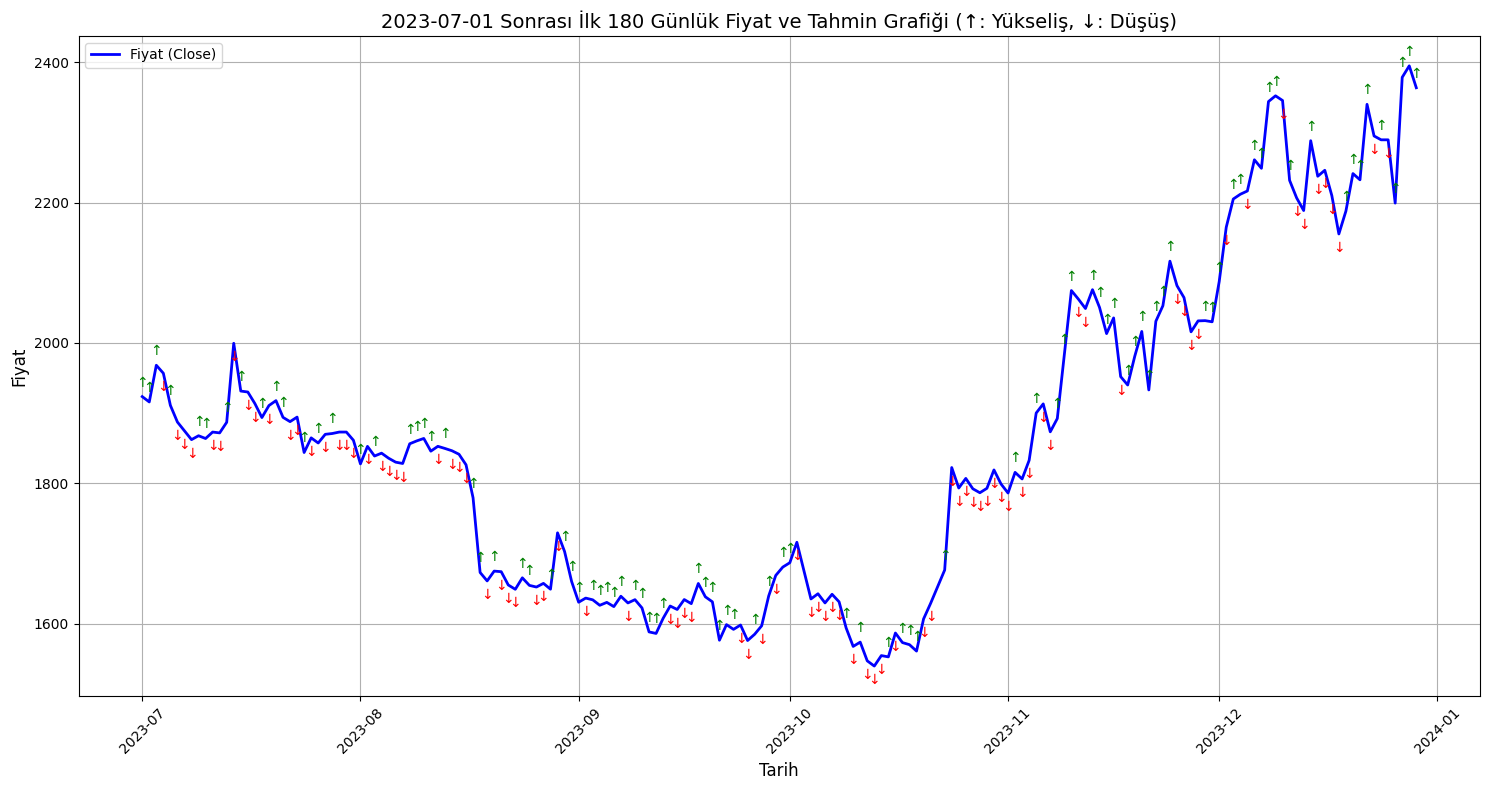

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tahmin sonuçlarını test veri setine ekleme
test_data = test_data.copy()  # Orijinal veriyi bozmamak için kopyalayın
test_data['Prediction'] = y_pred  # Tahminleri 'Prediction' sütununa ekle

# 2023-07-01 sonrası ilk 180 günü filtreleme
test_data_180 = test_data.head(180)  # İlk 180 günlük veriyi al

# Grafik oluşturma
plt.figure(figsize=(15, 8))

# Fiyat grafiği
plt.plot(test_data_180['Date'], test_data_180['Close'], label="Fiyat (Close)", color='blue', linewidth=2)

# Tahminlerin gösterimi
for i in range(len(test_data_180)):
    date = test_data_180['Date'].iloc[i]
    price = test_data_180['Close'].iloc[i]
    prediction = test_data_180['Prediction'].iloc[i]

    if prediction == 1:
        # Tahmin yükselişse "↑" işareti ekle
        plt.text(date, price + 10, '↑', color='green', fontsize=10, ha='center', va='bottom')
    else:
        # Tahmin düşüşse "↓" işareti ekle
        plt.text(date, price - 10, '↓', color='red', fontsize=10, ha='center', va='top')

# Grafik detayları
plt.title("2023-07-01 Sonrası İlk 180 Günlük Fiyat ve Tahmin Grafiği (↑: Yükseliş, ↓: Düşüş)", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Fiyat", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
print(test_data_180[['Date', 'Close', 'Prediction']].head(10))


          Date    Close  Prediction
181 2023-07-01  1923.50           1
182 2023-07-02  1915.87           1
183 2023-07-03  1968.17           1
184 2023-07-04  1956.78           0
185 2023-07-05  1911.00           1
186 2023-07-06  1887.25           0
187 2023-07-07  1874.62           0
188 2023-07-08  1862.21           0
189 2023-07-09  1867.74           1
190 2023-07-10  1863.80           1


# BERT

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

reddit_file_path = '/content/drive/My Drive/reddit.csv'

# 1. Reddit verilerini yükleme
reddit_df = pd.read_csv(reddit_file_path,index_col=0)
reddit_df

,Unique,created_utc
0,Which crypto is the best ???-> Setup,2024-12-26 10:25:05
1,Can I mine btc with an old gaming pc from 2017...,2024-12-23 13:55:49
2,Need a sticky,2024-12-20 18:53:34
3,Looking into mining crypto,2024-12-20 17:24:17
4,GPU Mining NEXA Is Over ASICs Online,2024-12-20 13:48:11
...,...,...
45804,I’m basically looking to automate my trading o...,2024-08-19 10:33:56
45805,"Hi,\n\nI have one running solo validator (Ligh...",2024-01-22 16:13:36
45806,"Hi, After some help. my validator has become u...",2024-01-21 02:21:58
45807,I have noticed a lot of airdrops for restaking...,2024-01-17 20:32:32


In [ ]:
# Tarih bilgisini reddit_df'ye ekleyelim
reddit_df['Date'] = reddit_df['created_utc']
# Tarih sütununu datetime formatına dönüştürelim
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])
reddit_df['Date'] = reddit_df['Date'].dt.date
# Tarih sütununa göre sıralama yapalım (küçükten büyüğe)
reddit_df = reddit_df.sort_values(by='Date')

# Sonuçları kontrol edelim
reddit_df

,Unique,created_utc,Date
44731,It amazes me that people over at /r/ethtrader ...,2016-02-17 20:12:14,2016-02-17
45199,What are the key performance indicators that p...,2016-02-17 22:27:30,2016-02-17
45135,Here are a few things that I think Ethereum ne...,2016-02-17 20:10:15,2016-02-17
22295,"Augur beta is 100%, ready for security testing...",2016-02-17 17:02:36,2016-02-17
22294,Key Performance Indicators for Long-Term Inves...,2016-02-17 22:27:30,2016-02-17
...,...,...,...
17426,NY Attorney General files lawsuit to recoup $2...,2025-01-12 05:34:47,2025-01-12
17427,Ethtrader Macro Update: Weekly ETF Recap and W...,2025-01-12 04:59:41,2025-01-12
17428,"Can The Ethereum Price Rebound To $4,000 This ...",2025-01-12 03:09:30,2025-01-12
17422,A continuación.,2025-01-12 07:22:10,2025-01-12


In [ ]:
reddit_df
import pandas as pd

# 'Date' sütununu datetime formatına dönüştürme
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])

# 2017-2021 ve 2021-2025 arası verileri ayırma
df_2017_2022 = reddit_df[reddit_df['Date'].dt.year <= 2022]
df_2023_2025 = reddit_df[reddit_df['Date'].dt.year > 2022]

# Sonuçları kontrol etme
print(df_2017_2022.head())
print(df_2023_2025.head())


                                                  Unique          created_utc  \
44731  It amazes me that people over at /r/ethtrader ...  2016-02-17 20:12:14   
45199  What are the key performance indicators that p...  2016-02-17 22:27:30   
45135  Here are a few things that I think Ethereum ne...  2016-02-17 20:10:15   
22295  Augur beta is 100%, ready for security testing...  2016-02-17 17:02:36   
22294  Key Performance Indicators for Long-Term Inves...  2016-02-17 22:27:30   

            Date  
44731 2016-02-17  
45199 2016-02-17  
45135 2016-02-17  
22295 2016-02-17  
22294 2016-02-17  
                                                  Unique          created_utc  \
12078  My first ETH staking payout of the New Year!!!...  2023-01-01 18:58:05   
14289          How ethereum has been made from scratch ?  2023-01-01 14:23:04   
5487                                   Ready for 2023...  2023-01-01 01:05:33   
8544         Staking rewards 2021 & 2022. Let’s go 2023!  2023-01-01 20:30:

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import drive

In [ ]:
# nltk indirmeleriimport nltk
nltk.download('all')
nltk.download('punkt')  # Punkt tokenizer'ı indirir
nltk.download('stopwords')
nltk.download('punkt')


# İngilizce stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Metni küçük harfe çevirme
    text = text.lower()
    # Link ve özel karakterleri kaldırma
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize etme ve stopwords temizleme
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Reddit metinlerine temizlik uygulama
reddit_df['cleaned_text'] = reddit_df['Unique'].fillna('').apply(clean_text)
df_2017_2022['cleaned_text'] = df_2017_2022['Unique'].fillna('').apply(clean_text)
df_2023_2025['cleaned_text'] = df_2023_2025['Unique'].fillna('').apply(clean_text)

# İlk temizlenmiş metinlere bakalım
print(df_2017_2022[['Unique', 'cleaned_text']].head())


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

                                                  Unique  \
44731  It amazes me that people over at /r/ethtrader ...   
45199  What are the key performance indicators that p...   
45135  Here are a few things that I think Ethereum ne...   
22295  Augur beta is 100%, ready for security testing...   
22294  Key Performance Indicators for Long-Term Inves...   

                                            cleaned_text  
44731  amazes people rethtrader treating like kind ge...  
45199  key performance indicators people following ad...  
45135  things think ethereum needs thrive top head di...  
22295            augur beta ready security testing stage  
22294      key performance indicators longterm investors  


<ipython-input-133-ff1ff20f8628>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['cleaned_text'] = df_2023_2025['Unique'].fillna('').apply(clean_text)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER analizörü
analyzer = SentimentIntensityAnalyzer()

# Duygu skorlarını hesaplama
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Genel duygu skorunu döndür

df_2017_2022['compound_score'] = df_2017_2022['cleaned_text'].apply(analyze_sentiment)


<ipython-input-134-a3c99db40fea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['compound_score'] = df_2017_2022['cleaned_text'].apply(analyze_sentiment)


In [ ]:
def sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'


df_2017_2022['sentiment'] = df_2017_2022['compound_score'].apply(sentiment_label)
df_2017_2022 = df_2017_2022[df_2017_2022['sentiment'].notna()]
df_2017_2022.head()

reddit_DF = reddit_df.copy()

<ipython-input-135-86a008776da5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2022['sentiment'] = df_2017_2022['compound_score'].apply(sentiment_label)


In [ ]:
from transformers import  Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
from torch.utils.data import Dataset

# Sadece gerekli sütunları seçin
# "Unique" -> Metin; "Sentiment" -> Etiket (Eğitim verisinde duygular belli olmalı)
df_2017_2022 = df_2017_2022[['cleaned_text', 'sentiment']]

# 2. Etiketleri sayısallaştırma
label_map = {"negative": 0, "positive": 1}
df_2017_2022['sentiment'] = df_2017_2022['sentiment'].map(label_map)
print(df_2017_2022)
# 3. Eğitim ve test verisi oluşturma
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_2017_2022['cleaned_text'], df_2017_2022['sentiment'], test_size=0.2, random_state=42
)

                                            cleaned_text  sentiment
44731  amazes people rethtrader treating like kind ge...          1
45135  things think ethereum needs thrive top head di...          1
22295            augur beta ready security testing stage          1
44480  conversation much different certain parties re...          1
21575                               think sub great idea          1
...                                                  ...        ...
13935  top evm blockchain networks terms transactions...          1
13933                     ethereum miner super connector          1
33248  would like initiate thread express gratitude e...          1
36831  early eth tvl miner super connector tg twitter...          1
36832  sometimes lose sight user experience like noob...          1

[8972 rows x 2 columns]


In [ ]:
pip install evaluate

In [ ]:
class RedditDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Tokenizer'ı yükleme
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', num_labels = 2)
# Dataset'leri oluşturma
train_dataset = RedditDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_length=128)
val_dataset = RedditDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_length=128)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score
)
from transformers import  Trainer, TrainingArguments
from evaluate import load
import time
import numpy as np
import matplotlib.pyplot as plt

# Modeli yükleme
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
# Eğitim parametreleri
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/models/bert_model11',
    num_train_epochs=10,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    dataloader_num_workers=12,
    learning_rate=1e-5
)

# Metrikleri tanımlama
accuracy_metric = load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')  # Sensitivity
    specificity = recall_score(labels, predictions, pos_label=0)  # Specificity
    f1 = f1_score(labels, predictions, average='binary')
    auc_value = roc_auc_score(labels, logits[:, 1])
    return {
        "accuracy": accuracy["accuracy"],
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1": f1,
        "auc": auc_value
    }

# Trainer'ı oluşturma
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Eğitim zamanı ölçümü
start_time = time.time()
trainer.train()
training_time = time.time() - start_time

# Modeli kaydetme
model.save_pretrained('/content/drive/MyDrive/models/bert_model')
tokenizer.save_pretrained('/content/drive/MyDrive/models/bert1_model')

print(f"Model eğitimi tamamlandı! Eğitim süresi: {training_time:.2f} saniye")

# Çıkarım zamanı ölçümü
start_time = time.time()
predictions = trainer.predict(val_dataset)
inference_time = time.time() - start_time

# Çıkarım süresini yazdırma
print(f"Model çıkarımı tamamlandı! Çıkarım süresi: {inference_time:.2f} saniye")

# Tahminler ve metrikler
logits, labels = predictions.predictions, predictions.label_ids
predicted_labels = np.argmax(logits, axis=-1)



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-139-b20a0d1d4c00>:61: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall (sensitivity),Specificity,F1,Auc
1,0.615900,0.594021,0.770474,0.770474,1.000000,0.000000,0.870359,0.521387
2,0.570000,0.555202,0.770474,0.770474,1.000000,0.000000,0.870359,0.558721
3,0.522500,0.525146,0.770474,0.770474,1.000000,0.000000,0.870359,0.626835
4,0.491800,0.504559,0.770474,0.770474,1.000000,0.000000,0.870359,0.711355
5,0.445100,0.435947,0.770474,0.770474,1.000000,0.000000,0.870359,0.852433
6,0.380700,0.365961,0.816156,0.812092,0.990600,0.230583,0.892508,0.895965
7,0.332100,0.298308,0.883008,0.908711,0.942878,0.682039,0.925479,0.917746
8,0.270900,0.263425,0.895265,0.930786,0.933478,0.766990,0.932130,0.935298
9,0.224100,0.246500,0.904735,0.934097,0.942878,0.776699,0.938467,0.942597
10,0.207700,0.236790,0.908078,0.936872,0.944324,0.786408,0.940583,0.949561


Model eğitimi tamamlandı! Eğitim süresi: 386.08 saniye


Model çıkarımı tamamlandı! Çıkarım süresi: 4.08 saniye


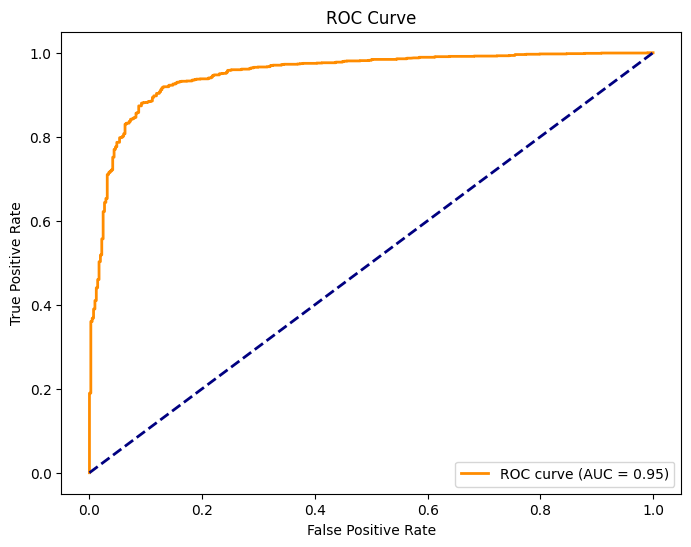

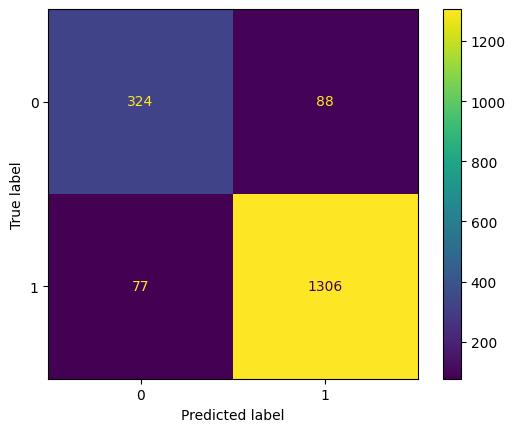

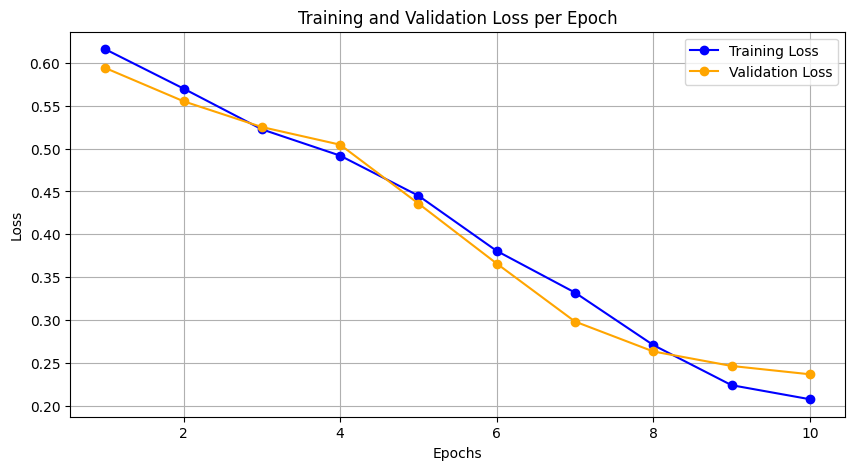

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
training_loss = [0.615900, 0.570000, 0.522500, 0.491800, 0.445100, 0.380700, 0.332100, 0.270900, 0.224100, 0.207700]
validation_loss = [0.594021, 0.555202, 0.525146, 0.504559, 0.435947, 0.365961, 0.298308, 0.263425, 0.246500, 0.236790]
epochs = [1,2,3,4,5,6,7,8,9,10]


# ROC eğrisi ve AUC hesaplama
fpr, tpr, _ = roc_curve(labels, logits[:, 1])
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


ConfusionMatrixDisplay.from_predictions(labels, predicted_labels)

# Kayıp grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label="Training Loss", marker='o', color='blue')
plt.plot(epochs, validation_loss, label="Validation Loss", marker='o', color='orange')
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



In [ ]:
import torch

# Cihazı kontrol et
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modeli cihaz üzerine taşıma
model.to(device)
label_map = {0: 'negative', 1: 'positive'}


# Eğitilmiş modeli yükleyin
model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/models/bert_model')
tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/models/bert1_model')
model.to(device)
# Metin için sentiment tahmini
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=-1)
    predicted_class = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][predicted_class].item()
    return label_map[predicted_class],confidence

# Tahmin sonuçları
df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))
df_2023_2025.to_csv('/content/df_2021_2025_with_sentimentalbert.csv', index=False)


<ipython-input-141-e2f6a376acc2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))
<ipython-input-141-e2f6a376acc2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2025['Sentiment'], df_2023_2025['Confidence'] = zip(*df_2023_2025['cleaned_text'].apply(predict_sentiment))


In [ ]:
df_2023_2025

,Unique,created_utc,Date,cleaned_text,Sentiment,Confidence
12078,My first ETH staking payout of the New Year!!!...,2023-01-01 18:58:05,2023-01-01,first eth staking payout new year lfg glta,positive,0.986469
14289,How ethereum has been made from scratch ?,2023-01-01 14:23:04,2023-01-01,ethereum made scratch,negative,0.885651
5487,Ready for 2023...,2023-01-01 01:05:33,2023-01-01,ready,positive,0.968936
8544,Staking rewards 2021 & 2022. Let’s go 2023!,2023-01-01 20:30:31,2023-01-01,staking rewards lets go,positive,0.984075
37186,how vitalik code ethereum in a low programming...,2023-01-01 14:23:04,2023-01-01,vitalik code ethereum low programming language...,negative,0.748267
...,...,...,...,...,...,...
17426,NY Attorney General files lawsuit to recoup $2...,2025-01-12 05:34:47,2025-01-12,ny attorney general files lawsuit recoup crypt...,negative,0.919704
17427,Ethtrader Macro Update: Weekly ETF Recap and W...,2025-01-12 04:59:41,2025-01-12,ethtrader macro update weekly etf recap week a...,positive,0.980643
17428,"Can The Ethereum Price Rebound To $4,000 This ...",2025-01-12 03:09:30,2025-01-12,ethereum price rebound january,positive,0.970028
17422,A continuación.,2025-01-12 07:22:10,2025-01-12,continuacin,positive,0.798554


In [ ]:
price_df_path = '/content/drive/My Drive/price.csv'
price_df = pd.read_csv(price_df_path)

# Tarih sütununu datetime formatına dönüştürelim
price_df['Open Time'] = pd.to_datetime(price_df['Open Time'])
price_df['Open Time'] = price_df['Open Time'].dt.date

# Tarih sütununa göre sıralama yapalım (küçükten büyüğe)
price_df = price_df.sort_values(by='Open Time')

price_df["Price Difference"] = price_df["Close"] - price_df["Open"]

# Sonuçları kontrol edelim
price_df.head()#2017-08-17 2024-12-26

,Open Time,Open,High,Low,Close,Volume,Price Difference
0,2017-08-17,301.13,302.57,298.00,301.61,125.66877,0.48
19,2017-08-17,306.74,310.85,302.00,302.00,229.60620,-4.74
18,2017-08-17,308.57,310.74,303.44,306.74,368.36785,-1.83
17,2017-08-17,304.79,309.40,304.04,307.44,330.54526,2.65
16,2017-08-17,301.60,309.40,299.01,304.79,272.42251,3.19


In [ ]:
# `cleaned_text`'i temizleyelim (boş satırlar varsa silelim)
df_2023_2025 = df_2023_2025.dropna(subset=['cleaned_text'])

# Tarih sütunlarını datetime formatına dönüştürelim
df_2023_2025['Date'] = pd.to_datetime(df_2023_2025['Date'])
price_df['Open Time'] = pd.to_datetime(price_df['Open Time'])

# Sadece aynı tarihlerde ve `cleaned_text` verisi eşleşen satırları birleştirelim (inner join)
merged_df = pd.merge(df_2023_2025, price_df, left_on='Date', right_on='Open Time', how='inner')

# Sonuçları kontrol edelim

merged_df = merged_df.drop_duplicates(subset=['cleaned_text'])

merged_df['Price Direction'] = merged_df['Price Difference'].apply(lambda x: 1 if x > 0 else 0)

merged_df.tail()

,Unique,created_utc,Date,cleaned_text,Sentiment,Confidence,Open Time,Open,High,Low,Close,Volume,Price Difference,Price Direction
353921,If you're considering selling then a word of a...,2024-12-26 19:57:29,2024-12-26,youre considering selling word advice dont wou...,positive,0.505799,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353945,So for the past month I’ve been trying everyth...,2024-12-26 03:57:02,2024-12-26,past month ive trying everything obtain etheri...,positive,0.974239,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353969,Today I did a quick research on prediction mar...,2024-12-26 13:18:18,2024-12-26,today quick research prediction markets see th...,positive,0.991101,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
353993,Help me obtain ethereium,2024-12-26 03:57:02,2024-12-26,help obtain ethereium,positive,0.975698,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0
354017,Good day legends! 🤩 \n\n## Asia Update\n\nJapa...,2024-12-26 15:10:35,2024-12-26,good day legends asia update japans government...,positive,0.981356,2024-12-26,3358.01,3364.37,3336.8,3354.19,16675.6435,-3.82,0


In [ ]:
silinecek_sutunlar = ["Unique", "created_utc"]

# Sütunları silme işlemi
merged_df1 = merged_df.drop(columns=silinecek_sutunlar)

In [ ]:
merged_df1['Sentiment'] = merged_df1['Sentiment'].map({'negative': -1, 'positive': 1})
merged_df1.head(15)

,Date,cleaned_text,Sentiment,Confidence,Open Time,Open,High,Low,Close,Volume,Price Difference,Price Direction
0,2023-01-01,first eth staking payout new year lfg glta,1,0.986469,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
24,2023-01-01,ethereum made scratch,-1,0.885651,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
48,2023-01-01,ready,1,0.968936,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
72,2023-01-01,staking rewards lets go,1,0.984075,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
96,2023-01-01,vitalik code ethereum low programming language...,-1,0.748267,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
120,2023-01-01,since staking eth last year date ive earned et...,1,0.989322,2023-01-01,1197.16,1197.29,1193.54,1195.26,4804.4490,-1.90,0
144,2023-01-02,make see nfts opensea,1,0.982292,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
168,2023-01-02,ethereum sticky developers million commits sub...,1,0.848590,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
192,2023-01-02,tickets blockchain fix,-1,0.901988,2023-01-02,1214.95,1218.39,1214.92,1216.78,9916.8659,1.83,1
216,2023-01-03,said last month start year eth staked currentl...,1,0.990123,2023-01-03,1216.40,1219.24,1206.00,1210.33,26626.7998,-6.07,0


In [ ]:
merged_df1cop = merged_df1.groupby("Date", as_index=False)["Sentiment"].mean()
merged_df1cop

,Date,Sentiment
0,2023-01-01,0.333333
1,2023-01-02,0.333333
2,2023-01-03,1.000000
3,2023-01-04,1.000000
4,2023-01-05,0.714286
...,...,...
719,2024-12-22,0.517241
720,2024-12-23,0.594203
721,2024-12-24,0.454545
722,2024-12-25,0.370370


In [ ]:
merged_d2f1cop = merged_df1.groupby("Date", as_index=False)["Confidence"].mean()
merged_d2f1cop

,Date,Confidence
0,2023-01-01,0.927120
1,2023-01-02,0.910957
2,2023-01-03,0.895025
3,2023-01-04,0.988063
4,2023-01-05,0.956248
...,...,...
719,2024-12-22,0.888118
720,2024-12-23,0.902222
721,2024-12-24,0.878133
722,2024-12-25,0.895868


In [ ]:
df = merged_df1cop

In [ ]:
df = merged_df1[['Date','Open','Close','Volume']]

In [ ]:
df = df.drop_duplicates()

In [ ]:
# İki DataFrame'i birleştirme
merged_dfcs = pd.merge(merged_df1cop, merged_d2f1cop, on='Date', how='inner')
merged_dfcs =merged_dfcs.drop_duplicates()
merged_dfcs

,Date,Sentiment,Confidence
0,2023-01-01,0.333333,0.927120
1,2023-01-02,0.333333,0.910957
2,2023-01-03,1.000000,0.895025
3,2023-01-04,1.000000,0.988063
4,2023-01-05,0.714286,0.956248
...,...,...,...
719,2024-12-22,0.517241,0.888118
720,2024-12-23,0.594203,0.902222
721,2024-12-24,0.454545,0.878133
722,2024-12-25,0.370370,0.895868


In [ ]:
# İki DataFrame'i birleştirme
merged_dfcs = pd.merge(merged_dfcs, df, on='Date', how='inner')
merged_dfcs =merged_dfcs.drop_duplicates()
merged_dfcs

,Date,Sentiment,Confidence,Open,Close,Volume
0,2023-01-01,0.333333,0.927120,1197.16,1195.26,4804.4490
1,2023-01-02,0.333333,0.910957,1214.95,1216.78,9916.8659
2,2023-01-03,1.000000,0.895025,1216.40,1210.33,26626.7998
3,2023-01-04,1.000000,0.988063,1250.99,1253.72,7141.4744
4,2023-01-05,0.714286,0.956248,1252.91,1247.50,20901.5401
...,...,...,...,...,...,...
719,2024-12-22,0.517241,0.888118,3375.11,3370.97,13969.4647
720,2024-12-23,0.594203,0.902222,3349.07,3317.60,20883.6725
721,2024-12-24,0.454545,0.878133,3452.95,3455.91,27559.3590
722,2024-12-25,0.370370,0.895868,3482.57,3490.59,8613.9488


In [ ]:
aligned = 0
for idx in merged_df1.index:
        if merged_df1["Sentiment"][idx] > 0 and merged_df1["Price Direction"][idx] == 1:
            aligned += 1
        elif merged_df1["Sentiment"][idx] < 0 and merged_df1["Price Direction"][idx] == 0:
            aligned += 1
print(f"Movement prediction accuracy : " \
          f"{round(aligned/merged_df1.shape[0], 4)*100}%")

Movement prediction accuracy : 50.82%


In [ ]:
df3 = merged_df1[['Date','Confidence','Open','High','Low','Close', 'Price Difference', 'Price Direction']]

In [ ]:
df3

,Date,Confidence,Open,High,Low,Close,Price Difference,Price Direction
0,2023-01-01,0.986469,1197.16,1197.29,1193.54,1195.26,-1.90,0
24,2023-01-01,0.885651,1197.16,1197.29,1193.54,1195.26,-1.90,0
48,2023-01-01,0.968936,1197.16,1197.29,1193.54,1195.26,-1.90,0
72,2023-01-01,0.984075,1197.16,1197.29,1193.54,1195.26,-1.90,0
96,2023-01-01,0.748267,1197.16,1197.29,1193.54,1195.26,-1.90,0
...,...,...,...,...,...,...,...,...
353921,2024-12-26,0.505799,3358.01,3364.37,3336.80,3354.19,-3.82,0
353945,2024-12-26,0.974239,3358.01,3364.37,3336.80,3354.19,-3.82,0
353969,2024-12-26,0.991101,3358.01,3364.37,3336.80,3354.19,-3.82,0
353993,2024-12-26,0.975698,3358.01,3364.37,3336.80,3354.19,-3.82,0


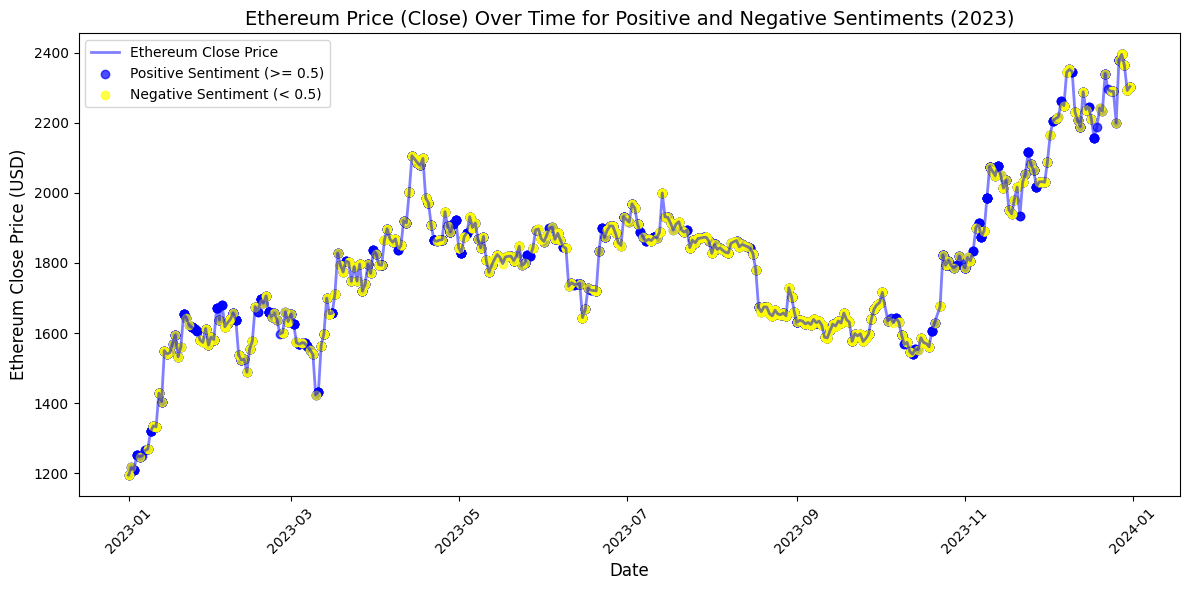

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df1' is the DataFrame containing the data

# Convert 'Date' to datetime if it's not already
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])

# Classify sentiment as positive (1) and negative (0) based on a threshold of 0.5
merged_df1['Sentiment Label'] = merged_df1['Sentiment'].apply(lambda x: 1 if x >= 0.5 else 0)

# Filter data for the year 2023
merged_df1 = merged_df1[merged_df1['Date'].dt.year == 2023]

# Plotting Ethereum price (Close) over time based on sentiment as scatter plot
plt.figure(figsize=(12,6))

# Plot normal Ethereum price (Close) over time as a line
plt.plot(merged_df1['Date'], merged_df1['Close'], label='Ethereum Close Price', color='blue', alpha=0.5, linewidth=2)

# Positive Sentiment (Sentiment >= 0.5)
positive_sentiment = merged_df1[merged_df1['Sentiment Label'] == 1]
plt.scatter(positive_sentiment['Date'], positive_sentiment['Close'], label='Positive Sentiment (>= 0.5)', color='blue', alpha=0.7)

# Negative Sentiment (Sentiment < 0.5)
negative_sentiment = merged_df1[merged_df1['Sentiment Label'] == 0]
plt.scatter(negative_sentiment['Date'], negative_sentiment['Close'], label='Negative Sentiment (< 0.5)', color='yellow', alpha=0.7)

# Adding labels and title
plt.title('Ethereum Price (Close) Over Time for Positive and Negative Sentiments (2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ethereum Close Price (USD)', fontsize=12)
plt.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = merged_dfcs
# Yön sütununu hesaplama
df['Direction'] = (df['Close'] > df['Open']).astype(int)

print(df)

          Date  Sentiment  Confidence     Open    Close      Volume  Direction
0   2023-01-01   0.333333    0.927120  1197.16  1195.26   4804.4490          0
1   2023-01-02   0.333333    0.910957  1214.95  1216.78   9916.8659          1
2   2023-01-03   1.000000    0.895025  1216.40  1210.33  26626.7998          0
3   2023-01-04   1.000000    0.988063  1250.99  1253.72   7141.4744          1
4   2023-01-05   0.714286    0.956248  1252.91  1247.50  20901.5401          0
..         ...        ...         ...      ...      ...         ...        ...
719 2024-12-22   0.517241    0.888118  3375.11  3370.97  13969.4647          0
720 2024-12-23   0.594203    0.902222  3349.07  3317.60  20883.6725          0
721 2024-12-24   0.454545    0.878133  3452.95  3455.91  27559.3590          1
722 2024-12-25   0.370370    0.895868  3482.57  3490.59   8613.9488          1
723 2024-12-26   0.593750    0.892914  3358.01  3354.19  16675.6435          0

[724 rows x 7 columns]


In [ ]:
train_data = df[df['Date'] < '2023-07-01']
test_data = df[df['Date'] >= '2023-07-01']

In [ ]:
# Eğitim ve test setlerinden özellik ve hedef sütunlarını ayırma
X_train = train_data[['Sentiment','Confidence', 'Volume']]
y_train = train_data['Direction']

X_test = test_data[['Sentiment','Confidence', 'Volume']]
y_test = test_data['Direction']

print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)


X_train:
     Sentiment  Confidence       Volume
0     0.333333    0.927120    4804.4490
1     0.333333    0.910957    9916.8659
2     1.000000    0.895025   26626.7998
3     1.000000    0.988063    7141.4744
4     0.714286    0.956248   20901.5401
..         ...         ...          ...
176   0.571429    0.955072   23474.3075
177   0.250000    0.909522   26396.8687
178   0.400000    0.919666   16301.5608
179   0.000000    0.872453   19885.3587
180   0.846154    0.969385  114030.6735

[181 rows x 3 columns]

y_train:
0      0
1      1
2      0
3      1
4      0
      ..
176    1
177    1
178    1
179    0
180    1
Name: Direction, Length: 181, dtype: int64


In [ ]:
# Modeli oluşturma ve eğitme
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Başarı oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.47


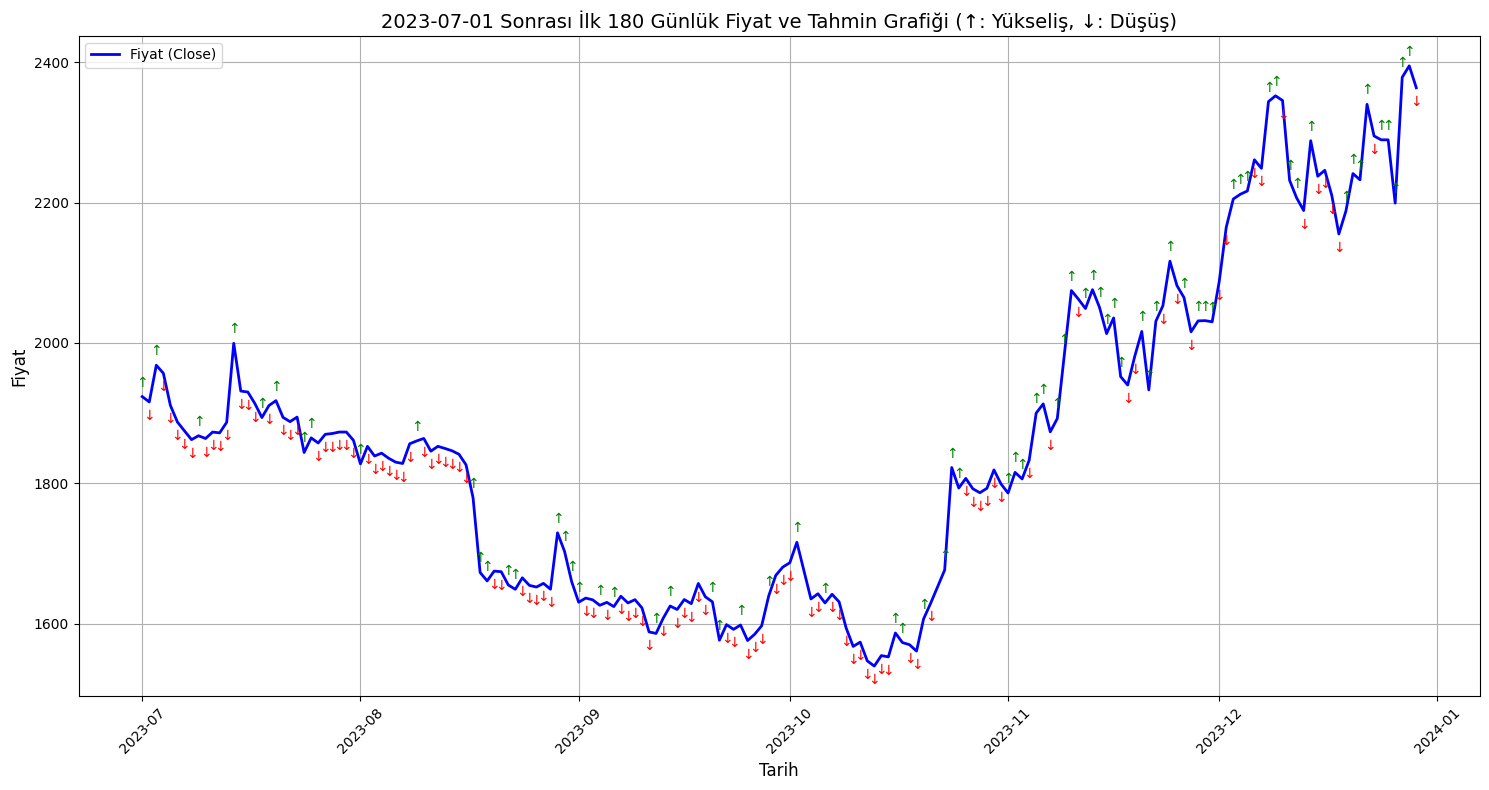

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tahmin sonuçlarını test veri setine ekleme
test_data = test_data.copy()  # Orijinal veriyi bozmamak için kopyalayın
test_data['Prediction'] = y_pred  # Tahminleri 'Prediction' sütununa ekle

# 2023-07-01 sonrası ilk 180 günü filtreleme
test_data_180 = test_data.head(180)  # İlk 180 günlük veriyi al

# Grafik oluşturma
plt.figure(figsize=(15, 8))

# Fiyat grafiği
plt.plot(test_data_180['Date'], test_data_180['Close'], label="Fiyat (Close)", color='blue', linewidth=2)

# Tahminlerin gösterimi
for i in range(len(test_data_180)):
    date = test_data_180['Date'].iloc[i]
    price = test_data_180['Close'].iloc[i]
    prediction = test_data_180['Prediction'].iloc[i]

    if prediction == 1:
        # Tahmin yükselişse "↑" işareti ekle
        plt.text(date, price + 10, '↑', color='green', fontsize=10, ha='center', va='bottom')
    else:
        # Tahmin düşüşse "↓" işareti ekle
        plt.text(date, price - 10, '↓', color='red', fontsize=10, ha='center', va='top')

# Grafik detayları
plt.title("2023-07-01 Sonrası İlk 180 Günlük Fiyat ve Tahmin Grafiği (↑: Yükseliş, ↓: Düşüş)", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Fiyat", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
print(test_data_180[['Date', 'Close', 'Prediction']].head(10))


          Date    Close  Prediction
181 2023-07-01  1923.50           1
182 2023-07-02  1915.87           0
183 2023-07-03  1968.17           1
184 2023-07-04  1956.78           0
185 2023-07-05  1911.00           0
186 2023-07-06  1887.25           0
187 2023-07-07  1874.62           0
188 2023-07-08  1862.21           0
189 2023-07-09  1867.74           1
190 2023-07-10  1863.80           0
